In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
df_sic_peers = pd.read_csv("df_sic_peers.csv")

In [3]:
len(df_sic_peers)

385

In [4]:
df_sic_peers[["ticker", "datekey"]][df_sic_peers["ticker"] == "ACI"]

,ticker,datekey
371,ACI,2021-04-28
372,ACI,2021-01-13
373,ACI,2020-10-21
374,ACI,2020-08-04
375,ACI,2020-06-18
376,ACI,2020-05-13
377,ACI,2020-01-08
378,ACI,2019-10-16
379,ACI,2019-07-24
380,ACI,2019-04-24


In [5]:
len(df_sic_peers["ticker"].unique())

19

In [6]:
df_sic_peers["ticker"].unique()

array(['WMK', 'WFM', 'VLGEA', 'TFM', 'SWY', 'SFS', 'SFM', 'RNDY', 'QKLS',
       'NGVC', 'KR', 'IMKTA', 'IFMK', 'HTSI', 'GO', 'FWMHQ', 'ASAI',
       'ARDNA', 'ACI'], dtype=object)

In [7]:
df_prices = pd.read_csv("prices.csv")

In [8]:
df_prices.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated
0,WMK,2021-05-20,52.76,52.93,51.85,52.35,51684.0,52.35,52.35,2021-05-20
1,WMK,2021-05-19,54.11,54.11,52.29,52.58,77231.0,52.58,52.58,2021-05-19
2,WMK,2021-05-18,54.38,54.95,54.03,54.36,151493.0,54.36,54.36,2021-05-18
3,WMK,2021-05-17,53.92,54.49,53.45,54.20,104194.0,54.20,54.20,2021-05-17
4,WMK,2021-05-14,53.93,54.49,53.54,53.96,90920.0,53.96,53.96,2021-05-14


In [9]:
df_sic_peers.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,WMK,ARQ,2021-03-31,2021-05-06,2021-03-27,2021-05-06,2512000.0,1.784923e+09,NaN,586996000.0,...,26898443.0,26898443.0,26898443.0,37.413,1.715185e+09,0.0,8415000.0,115435000.0,63.765,288957000.0
1,WMK,ARQ,2020-12-31,2021-03-11,2020-12-26,2021-05-06,3286000.0,1.820421e+09,NaN,626202000.0,...,26898443.0,26898443.0,26898443.0,38.132,1.750532e+09,0.0,8246000.0,108462000.0,65.079,279933000.0
2,WMK,ARQ,2020-09-30,2020-11-05,2020-09-26,2021-05-06,2959000.0,1.756733e+09,NaN,586745000.0,...,26898443.0,26898443.0,26898443.0,37.266,1.686571e+09,0.0,12142000.0,109646000.0,62.701,286083000.0
3,WMK,ARQ,2020-06-30,2020-08-05,2020-06-27,2021-05-06,2598000.0,1.739130e+09,NaN,578379000.0,...,26898443.0,26898443.0,26898443.0,40.846,1.668504e+09,0.0,14978000.0,129294000.0,62.030,267061000.0
4,WMK,ARQ,2020-03-31,2020-05-07,2020-03-28,2021-05-06,1569000.0,1.716364e+09,NaN,551734000.0,...,26898443.0,26898443.0,26898443.0,36.650,1.646325e+09,0.0,9396000.0,114581000.0,61.205,229925000.0


In [10]:
df_prices["date_2"] = pd.to_datetime(df_prices["date"], format="%Y-%m-%d")

In [11]:
df_prices["date_2"].max()

Timestamp('2021-05-20 00:00:00')

In [12]:
df_prices.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
0,WMK,2021-05-20,52.76,52.93,51.85,52.35,51684.0,52.35,52.35,2021-05-20,2021-05-20
1,WMK,2021-05-19,54.11,54.11,52.29,52.58,77231.0,52.58,52.58,2021-05-19,2021-05-19
2,WMK,2021-05-18,54.38,54.95,54.03,54.36,151493.0,54.36,54.36,2021-05-18,2021-05-18
3,WMK,2021-05-17,53.92,54.49,53.45,54.20,104194.0,54.20,54.20,2021-05-17,2021-05-17
4,WMK,2021-05-14,53.93,54.49,53.54,53.96,90920.0,53.96,53.96,2021-05-14,2021-05-14


In [13]:
df_prices.drop("date_2", inplace=True, axis=1)

In [14]:
len(df_prices)

26026

In [15]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26026 entries, 0 to 26025
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       26026 non-null  object 
 1   date         26026 non-null  object 
 2   open         26026 non-null  float64
 3   high         26026 non-null  float64
 4   low          26026 non-null  float64
 5   close        26026 non-null  float64
 6   volume       26026 non-null  float64
 7   closeadj     26026 non-null  float64
 8   closeunadj   26026 non-null  float64
 9   lastupdated  26026 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.0+ MB


In [16]:
df_prices_mackinlay_windows = pd.read_csv(
    "additional_prices_mackinlay_windows_processed_data.csv"
)

In [17]:
df_prices_mackinlay_windows.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated
0,ACI,2021-09-01,30.51,31.28,29.55,30.18,1766137.0,30.18,30.18,2021-09-01
1,ASAI,2021-09-01,16.34,16.95,16.34,16.56,191294.0,16.56,16.56,2021-09-01
2,GO,2021-09-01,25.98,26.01,25.55,25.83,774089.0,25.83,25.83,2021-09-01
3,IFMK,2021-09-01,1.18,1.18,1.11,1.13,92416.0,1.13,1.13,2021-09-01
4,IMKTA,2021-09-01,67.85,68.50,67.01,68.24,59453.0,68.24,68.24,2021-09-01


In [18]:
df_prices_mackinlay_windows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       879 non-null    object 
 1   date         879 non-null    object 
 2   open         879 non-null    float64
 3   high         879 non-null    float64
 4   low          879 non-null    float64
 5   close        879 non-null    float64
 6   volume       879 non-null    float64
 7   closeadj     879 non-null    float64
 8   closeunadj   879 non-null    float64
 9   lastupdated  879 non-null    object 
dtypes: float64(7), object(3)
memory usage: 68.8+ KB


In [19]:
df_prices = pd.concat([df_prices, df_prices_mackinlay_windows])

In [20]:
len(df_prices)

26905

In [21]:
26905 - 26026

879

In [22]:
df_prices["date_2"] = pd.to_datetime(df_prices["date"], format="%Y-%m-%d")

In [23]:
df_prices.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
0,WMK,2021-05-20,52.76,52.93,51.85,52.35,51684.0,52.35,52.35,2021-05-20,2021-05-20
1,WMK,2021-05-19,54.11,54.11,52.29,52.58,77231.0,52.58,52.58,2021-05-19,2021-05-19
2,WMK,2021-05-18,54.38,54.95,54.03,54.36,151493.0,54.36,54.36,2021-05-18,2021-05-18
3,WMK,2021-05-17,53.92,54.49,53.45,54.20,104194.0,54.20,54.20,2021-05-17,2021-05-17
4,WMK,2021-05-14,53.93,54.49,53.54,53.96,90920.0,53.96,53.96,2021-05-14,2021-05-14


In [24]:
df_prices.sort_values(by=["ticker", "date_2"], ascending=False, inplace=True)

In [25]:
df_prices.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
878,WMK,2021-09-15,53.47,54.219,53.19,53.90,73305.0,53.90,53.90,2021-09-15,2021-09-15
868,WMK,2021-09-14,55.47,55.750,53.27,53.40,69381.0,53.40,53.40,2021-09-14,2021-09-14
853,WMK,2021-09-13,55.78,56.320,55.02,55.32,69568.0,55.32,55.32,2021-09-13,2021-09-13
841,WMK,2021-09-10,56.87,56.870,55.58,55.77,79970.0,55.77,55.77,2021-09-10,2021-09-10
831,WMK,2021-09-09,56.31,57.290,55.88,56.82,52773.0,56.82,56.82,2021-09-09,2021-09-09


In [26]:
df_prices[df_prices["ticker"] == "WMK"].head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
878,WMK,2021-09-15,53.47,54.219,53.19,53.90,73305.0,53.90,53.90,2021-09-15,2021-09-15
868,WMK,2021-09-14,55.47,55.750,53.27,53.40,69381.0,53.40,53.40,2021-09-14,2021-09-14
853,WMK,2021-09-13,55.78,56.320,55.02,55.32,69568.0,55.32,55.32,2021-09-13,2021-09-13
841,WMK,2021-09-10,56.87,56.870,55.58,55.77,79970.0,55.77,55.77,2021-09-10,2021-09-10
831,WMK,2021-09-09,56.31,57.290,55.88,56.82,52773.0,56.82,56.82,2021-09-09,2021-09-09


In [27]:
df_prices[df_prices["ticker"] == "WMK"].tail()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
2231,WMK,2012-07-09,45.64,45.69,45.28,45.53,10000.0,35.919,45.53,2021-05-07,2012-07-09
2232,WMK,2012-07-06,45.32,45.91,45.26,45.82,17700.0,36.147,45.82,2021-05-07,2012-07-06
2233,WMK,2012-07-05,45.43,45.91,45.43,45.75,24300.0,36.092,45.75,2021-05-07,2012-07-05
2234,WMK,2012-07-03,44.96,45.57,44.96,45.57,12900.0,35.950,45.57,2021-05-07,2012-07-03
2235,WMK,2012-07-02,44.55,45.21,44.34,45.18,26800.0,35.642,45.18,2021-05-07,2012-07-02


In [28]:
df_prices.reset_index(drop=True, inplace=True)

In [29]:
df_prices.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
0,WMK,2021-09-15,53.47,54.219,53.19,53.90,73305.0,53.90,53.90,2021-09-15,2021-09-15
1,WMK,2021-09-14,55.47,55.750,53.27,53.40,69381.0,53.40,53.40,2021-09-14,2021-09-14
2,WMK,2021-09-13,55.78,56.320,55.02,55.32,69568.0,55.32,55.32,2021-09-13,2021-09-13
3,WMK,2021-09-10,56.87,56.870,55.58,55.77,79970.0,55.77,55.77,2021-09-10,2021-09-10
4,WMK,2021-09-09,56.31,57.290,55.88,56.82,52773.0,56.82,56.82,2021-09-09,2021-09-09


In [30]:
df_prices["date_2"].describe(datetime_is_numeric=True)

count                            26905
mean     2016-10-28 10:54:34.186948608
min                2012-07-02 00:00:00
25%                2014-06-18 00:00:00
50%                2016-07-22 00:00:00
75%                2019-03-07 00:00:00
max                2021-09-15 00:00:00
Name: date_2, dtype: object

In [31]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26905 entries, 0 to 26904
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ticker       26905 non-null  object        
 1   date         26905 non-null  object        
 2   open         26905 non-null  float64       
 3   high         26905 non-null  float64       
 4   low          26905 non-null  float64       
 5   close        26905 non-null  float64       
 6   volume       26905 non-null  float64       
 7   closeadj     26905 non-null  float64       
 8   closeunadj   26905 non-null  float64       
 9   lastupdated  26905 non-null  object        
 10  date_2       26905 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 2.3+ MB


In [32]:
len(df_prices["ticker"].unique())

20

In [33]:
len(df_sic_peers["ticker"].unique())

19

In [34]:
df_prices["ticker"].unique()

array(['WMK', 'WFM', 'VLGEA', 'TFM', 'SWY', 'SFS', 'SFM', 'RNDY', 'QKLS',
       'NGVC', 'KR', 'IMKTA', 'IFMK', 'HTSI', 'GO', 'FWMHQ', 'CBD',
       'ASAI', 'ARDNA', 'ACI'], dtype=object)

In [35]:
for i in df_prices["ticker"].unique():
    if i not in df_sic_peers["ticker"].unique():
        print(i)

CBD


In [36]:
df_prices[df_prices["ticker"] == "ACI"]

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
26597,ACI,2021-09-15,29.655,31.000,29.47,30.78,1308109.0,30.780,30.78,2021-09-15,2021-09-15
26598,ACI,2021-09-14,30.690,30.800,29.53,29.63,1515390.0,29.630,29.63,2021-09-14,2021-09-14
26599,ACI,2021-09-13,30.350,31.400,30.35,30.45,1448156.0,30.450,30.45,2021-09-13,2021-09-13
26600,ACI,2021-09-10,32.080,32.108,29.68,30.03,2365836.0,30.030,30.03,2021-09-10,2021-09-10
26601,ACI,2021-09-09,31.990,32.830,31.62,32.17,1462545.0,32.170,32.17,2021-09-09,2021-09-09
...,...,...,...,...,...,...,...,...,...,...,...
26900,ACI,2020-07-02,15.820,15.890,15.60,15.81,7190929.0,15.539,15.81,2021-04-26,2020-07-02
26901,ACI,2020-07-01,15.790,15.890,15.55,15.76,3400498.0,15.490,15.76,2021-04-26,2020-07-01
26902,ACI,2020-06-30,15.570,15.900,15.45,15.77,5030640.0,15.500,15.77,2021-04-26,2020-06-30
26903,ACI,2020-06-29,15.890,16.010,15.50,15.57,7349059.0,15.303,15.57,2021-04-26,2020-06-29


In [37]:
df_prices[
    (df_prices["ticker"] == "ACI")
    & (df_prices["date"] >= "2018-05-07")
    & (df_prices["date"] <= "2020-06-24")
]

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2


In [38]:
df_sic_peers.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,WMK,ARQ,2021-03-31,2021-05-06,2021-03-27,2021-05-06,2512000.0,1.784923e+09,NaN,586996000.0,...,26898443.0,26898443.0,26898443.0,37.413,1.715185e+09,0.0,8415000.0,115435000.0,63.765,288957000.0
1,WMK,ARQ,2020-12-31,2021-03-11,2020-12-26,2021-05-06,3286000.0,1.820421e+09,NaN,626202000.0,...,26898443.0,26898443.0,26898443.0,38.132,1.750532e+09,0.0,8246000.0,108462000.0,65.079,279933000.0
2,WMK,ARQ,2020-09-30,2020-11-05,2020-09-26,2021-05-06,2959000.0,1.756733e+09,NaN,586745000.0,...,26898443.0,26898443.0,26898443.0,37.266,1.686571e+09,0.0,12142000.0,109646000.0,62.701,286083000.0
3,WMK,ARQ,2020-06-30,2020-08-05,2020-06-27,2021-05-06,2598000.0,1.739130e+09,NaN,578379000.0,...,26898443.0,26898443.0,26898443.0,40.846,1.668504e+09,0.0,14978000.0,129294000.0,62.030,267061000.0
4,WMK,ARQ,2020-03-31,2020-05-07,2020-03-28,2021-05-06,1569000.0,1.716364e+09,NaN,551734000.0,...,26898443.0,26898443.0,26898443.0,36.650,1.646325e+09,0.0,9396000.0,114581000.0,61.205,229925000.0


In [39]:
for i in df_sic_peers["ticker"].unique():
    df_temp_sic = df_sic_peers[df_sic_peers["ticker"] == i]
    df_temp_prices = df_prices[df_prices["ticker"] == i]
    # Create two lists, one that contains the dates from the SEC fillings
    # and the other that contains dates from the stock prices series.
    lister = []
    lister_2 = []
    for j in df_temp_sic["datekey"]:
        lister.append(j)
    for q in df_temp_prices["date"]:
        lister_2.append(q)
    # Identify financial statement dates without stock price data. Also,
    # see if shifting the SEC reporting dates forward by a day or two and
    # backward by a day or two result in mergeable dates. Note that this
    # only worked for GO and FWMHQ around their IPOs. This is further
    # examined below the loop. GO's first trading day was 6/20/19
    # and FWMHQ's first trading day was 4/15/13. The loops further
    # condition on pd.dattime().weekday() values which are 0 for Monday
    # and 6 for Sunday. .weekday() values in the data are [0-4].
    for z in lister:
        if z not in lister_2:
            print("Non-trading date fillings:", i, z)
            print("Day of the week is:", i, z, pd.to_datetime(z).weekday())
            print(
                str(pd.to_datetime(z).date()),
                str(pd.to_datetime(z).date() + pd.Timedelta("1 day")),
            )
            if pd.to_datetime(z).weekday() <= 3:
                print(
                    "Plus one day:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() + pd.Timedelta("1 day")),
                    str(pd.to_datetime(z).date() + pd.Timedelta("1 day")) in lister_2,
                )
            if pd.to_datetime(z).weekday() <= 3:
                print(
                    "Minus one day:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() - pd.Timedelta("1 day")),
                    str(pd.to_datetime(z).date() - pd.Timedelta("1 day")) in lister_2,
                )
            if pd.to_datetime(z).weekday() <= 3:
                print(
                    "Plus two days:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() + pd.Timedelta("2 days")),
                    str(pd.to_datetime(z).date() + pd.Timedelta("2 days")) in lister_2,
                )
            if pd.to_datetime(z).weekday() <= 3:
                print(
                    "Minus two days:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() - pd.Timedelta("2 days")),
                    str(pd.to_datetime(z).date() - pd.Timedelta("2 days")) in lister_2,
                )
            if (pd.to_datetime(z).weekday() > 3) & (pd.to_datetime(z).weekday() <= 5):
                print(
                    "Plus one day:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() + pd.Timedelta("1 day")),
                    str(pd.to_datetime(z).date() + pd.Timedelta("1 day")) in lister_2,
                )
                print(
                    "Minus one day:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() - pd.Timedelta("1 day")),
                    str(pd.to_datetime(z).date() - pd.Timedelta("1 day")) in lister_2,
                )
                print(
                    "Plus two days:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() + pd.Timedelta("2 days")),
                    str(pd.to_datetime(z).date() + pd.Timedelta("2 days")) in lister_2,
                )
                print(
                    "Minus two days:",
                    i,
                    z,
                    str(pd.to_datetime(z).date() - pd.Timedelta("2 days")),
                    str(pd.to_datetime(z).date() - pd.Timedelta("2 days")) in lister_2,
                )

Non-trading date fillings: SWY 2015-03-04
Day of the week is: SWY 2015-03-04 2
2015-03-04 2015-03-05
Plus one day: SWY 2015-03-04 2015-03-05 False
Minus one day: SWY 2015-03-04 2015-03-03 False
Plus two days: SWY 2015-03-04 2015-03-06 False
Minus two days: SWY 2015-03-04 2015-03-02 False
Non-trading date fillings: SFM 2013-07-29
Day of the week is: SFM 2013-07-29 0
2013-07-29 2013-07-30
Plus one day: SFM 2013-07-29 2013-07-30 False
Minus one day: SFM 2013-07-29 2013-07-28 False
Plus two days: SFM 2013-07-29 2013-07-31 False
Minus two days: SFM 2013-07-29 2013-07-27 False
Non-trading date fillings: SFM 2013-07-22
Day of the week is: SFM 2013-07-22 0
2013-07-22 2013-07-23
Plus one day: SFM 2013-07-22 2013-07-23 False
Minus one day: SFM 2013-07-22 2013-07-21 False
Plus two days: SFM 2013-07-22 2013-07-24 False
Minus two days: SFM 2013-07-22 2013-07-20 False
Non-trading date fillings: NGVC 2012-07-20
Day of the week is: NGVC 2012-07-20 4
2012-07-20 2012-07-21
Plus one day: NGVC 2012-07-20 

In [40]:
df_prices[
    (df_prices["ticker"] == "SWY")
    & (df_prices["date"] >= "2015-03-01")
    & (df_prices["date"] <= "2015-03-10")
]

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2


In [41]:
df_prices[df_prices["ticker"] == "SWY"]

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
6893,SWY,2015-01-29,35.15,35.190,35.10,35.10,52536765.0,35.100,35.10,2018-06-13,2015-01-29
6894,SWY,2015-01-28,35.18,35.260,35.14,35.14,12601142.0,35.140,35.14,2018-06-13,2015-01-28
6895,SWY,2015-01-27,35.06,35.240,35.05,35.15,19249742.0,35.150,35.15,2018-06-13,2015-01-27
6896,SWY,2015-01-26,35.16,35.220,35.10,35.10,41624928.0,35.100,35.10,2018-06-13,2015-01-26
6897,SWY,2015-01-23,35.29,35.290,35.22,35.29,991713.0,35.290,35.29,2018-06-13,2015-01-23
...,...,...,...,...,...,...,...,...,...,...,...
7536,SWY,2012-07-09,17.62,17.750,17.33,17.40,4516600.0,16.168,17.40,2018-06-13,2012-07-09
7537,SWY,2012-07-06,17.72,17.810,17.55,17.71,4352400.0,16.456,17.71,2018-06-13,2012-07-06
7538,SWY,2012-07-05,17.87,17.960,17.59,17.74,5424800.0,16.484,17.74,2018-06-13,2012-07-05
7539,SWY,2012-07-03,17.88,18.080,17.85,17.97,1713800.0,16.698,17.97,2018-06-13,2012-07-03


In [42]:
df_prices[
    (df_prices["ticker"] == "GO")
    & (df_prices["date"] >= "2019-06-01")
    & (df_prices["date"] <= "2019-06-30")
]

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
22998,GO,2019-06-28,32.74,34.200,32.273,32.88,541394.0,32.88,32.88,2020-05-01,2019-06-28
22999,GO,2019-06-27,33.31,33.950,32.050,32.71,1057248.0,32.71,32.71,2020-05-01,2019-06-27
23000,GO,2019-06-26,31.49,35.630,31.040,32.98,2939229.0,32.98,32.98,2020-05-01,2019-06-26
23001,GO,2019-06-25,29.90,31.293,29.599,30.69,788947.0,30.69,30.69,2020-05-01,2019-06-25
23002,GO,2019-06-24,28.61,30.390,27.750,29.99,1085362.0,29.99,29.99,2020-05-01,2019-06-24
23003,GO,2019-06-21,29.74,29.900,27.880,28.60,1773046.0,28.60,28.60,2020-05-01,2019-06-21
23004,GO,2019-06-20,31.00,31.500,28.000,28.51,13395468.0,28.51,28.51,2019-06-23,2019-06-20


In [43]:
df_prices[
    (df_prices["ticker"] == "FWMHQ")
    & (df_prices["date"] >= "2013-04-01")
    & (df_prices["date"] <= "2013-04-30")
]

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
23807,FWMHQ,2013-04-30,17.90,17.90,17.27,17.58,175800.0,17.58,17.58,2019-06-07,2013-04-30
23808,FWMHQ,2013-04-29,17.95,17.95,17.32,17.45,337000.0,17.45,17.45,2019-06-07,2013-04-29
23809,FWMHQ,2013-04-26,17.54,17.65,17.05,17.18,246300.0,17.18,17.18,2019-06-07,2013-04-26
23810,FWMHQ,2013-04-25,18.09,18.15,17.56,17.68,327600.0,17.68,17.68,2019-06-07,2013-04-25
23811,FWMHQ,2013-04-24,18.81,18.89,17.51,17.93,435900.0,17.93,17.93,2019-06-07,2013-04-24
23812,FWMHQ,2013-04-23,18.89,19.00,18.40,18.66,244252.0,18.66,18.66,2019-06-07,2013-04-23
23813,FWMHQ,2013-04-22,19.37,19.37,18.37,18.89,197100.0,18.89,18.89,2019-06-07,2013-04-22
23814,FWMHQ,2013-04-19,19.00,19.45,18.25,18.69,369400.0,18.69,18.69,2019-06-07,2013-04-19
23815,FWMHQ,2013-04-18,18.19,19.07,17.63,18.83,1683801.0,18.83,18.83,2019-06-07,2013-04-18
23816,FWMHQ,2013-04-17,18.00,18.41,16.00,17.35,12994769.0,17.35,17.35,2019-06-07,2013-04-17


In [44]:
df_sic_peers.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,WMK,ARQ,2021-03-31,2021-05-06,2021-03-27,2021-05-06,2512000.0,1.784923e+09,NaN,586996000.0,...,26898443.0,26898443.0,26898443.0,37.413,1.715185e+09,0.0,8415000.0,115435000.0,63.765,288957000.0
1,WMK,ARQ,2020-12-31,2021-03-11,2020-12-26,2021-05-06,3286000.0,1.820421e+09,NaN,626202000.0,...,26898443.0,26898443.0,26898443.0,38.132,1.750532e+09,0.0,8246000.0,108462000.0,65.079,279933000.0
2,WMK,ARQ,2020-09-30,2020-11-05,2020-09-26,2021-05-06,2959000.0,1.756733e+09,NaN,586745000.0,...,26898443.0,26898443.0,26898443.0,37.266,1.686571e+09,0.0,12142000.0,109646000.0,62.701,286083000.0
3,WMK,ARQ,2020-06-30,2020-08-05,2020-06-27,2021-05-06,2598000.0,1.739130e+09,NaN,578379000.0,...,26898443.0,26898443.0,26898443.0,40.846,1.668504e+09,0.0,14978000.0,129294000.0,62.030,267061000.0
4,WMK,ARQ,2020-03-31,2020-05-07,2020-03-28,2021-05-06,1569000.0,1.716364e+09,NaN,551734000.0,...,26898443.0,26898443.0,26898443.0,36.650,1.646325e+09,0.0,9396000.0,114581000.0,61.205,229925000.0


In [45]:
df_sic_peers.loc[
    (df_sic_peers["datekey"] == "2019-06-18") & (df_sic_peers["ticker"] == "GO")
]

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
349,GO,ARQ,2019-03-31,2019-06-18,2019-03-30,2021-05-12,0.0,2.059912e+09,NaN,256614000.0,...,85703639.0,68514000.0,68553000.0,8.849,1.244978e+09,0.0,1444000.0,19667000.0,18.171,63000000.0


In [46]:
df_sic_peers.loc[
    (df_sic_peers["datekey"] == "2019-06-18") & (df_sic_peers["ticker"] == "GO"),
    "datekey",
] = "2019-06-20"

In [47]:
df_sic_peers.loc[
    (df_sic_peers["datekey"] == "2019-06-20") & (df_sic_peers["ticker"] == "GO")
]

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
349,GO,ARQ,2019-03-31,2019-06-20,2019-03-30,2021-05-12,0.0,2.059912e+09,NaN,256614000.0,...,85703639.0,68514000.0,68553000.0,8.849,1.244978e+09,0.0,1444000.0,19667000.0,18.171,63000000.0


In [48]:
df_sic_peers.loc[
    (df_sic_peers["datekey"] == "2013-04-16") & (df_sic_peers["ticker"] == "FWMHQ")
]

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
362,FWMHQ,ARQ,2012-12-31,2013-04-16,2012-12-30,2019-06-07,0.0,339178000.0,NaN,75015000.0,...,41238260.0,41238260.0,NaN,NaN,218032000.0,4856000.0,NaN,0.0,5.287,16109000.0


In [49]:
df_sic_peers.loc[
    (df_sic_peers["datekey"] == "2013-04-16") & (df_sic_peers["ticker"] == "FWMHQ"),
    "datekey",
] = "2013-04-17"

In [50]:
df_sic_peers.loc[
    (df_sic_peers["datekey"] == "2013-04-17") & (df_sic_peers["ticker"] == "FWMHQ")
]

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
362,FWMHQ,ARQ,2012-12-31,2013-04-17,2012-12-30,2019-06-07,0.0,339178000.0,NaN,75015000.0,...,41238260.0,41238260.0,NaN,NaN,218032000.0,4856000.0,NaN,0.0,5.287,16109000.0


In [51]:
df_sic_peers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 111 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ticker          object 
 1   dimension       object 
 2   calendardate    object 
 3   datekey         object 
 4   reportperiod    object 
 5   lastupdated     object 
 6   accoci          float64
 7   assets          float64
 8   assetsavg       float64
 9   assetsc         float64
 10  assetsnc        float64
 11  assetturnover   float64
 12  bvps            float64
 13  capex           float64
 14  cashneq         float64
 15  cashnequsd      float64
 16  cor             float64
 17  consolinc       float64
 18  currentratio    float64
 19  de              float64
 20  debt            float64
 21  debtc           float64
 22  debtnc          float64
 23  debtusd         float64
 24  deferredrev     float64
 25  depamor         float64
 26  deposits        float64
 27  divyield        float64
 28  dps             flo

In [52]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26905 entries, 0 to 26904
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ticker       26905 non-null  object        
 1   date         26905 non-null  object        
 2   open         26905 non-null  float64       
 3   high         26905 non-null  float64       
 4   low          26905 non-null  float64       
 5   close        26905 non-null  float64       
 6   volume       26905 non-null  float64       
 7   closeadj     26905 non-null  float64       
 8   closeunadj   26905 non-null  float64       
 9   lastupdated  26905 non-null  object        
 10  date_2       26905 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 2.3+ MB


In [53]:
df_sic_peers["datekey"] = pd.to_datetime(df_sic_peers["datekey"])

In [54]:
df_prices["date"] = pd.to_datetime(df_prices["date"])

In [55]:
df_sic_peers.rename(columns={"datekey": "date"}, inplace=True)

In [56]:
df_sic_peers["datekey"] = df_sic_peers["date"]

In [57]:
df = pd.merge(df_prices, df_sic_peers, on=["ticker", "date"], how="left")

In [58]:
df.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated_x,...,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital,datekey
0,WMK,2021-09-15,53.47,54.219,53.19,53.90,73305.0,53.90,53.90,2021-09-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,WMK,2021-09-14,55.47,55.750,53.27,53.40,69381.0,53.40,53.40,2021-09-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,WMK,2021-09-13,55.78,56.320,55.02,55.32,69568.0,55.32,55.32,2021-09-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,WMK,2021-09-10,56.87,56.870,55.58,55.77,79970.0,55.77,55.77,2021-09-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,WMK,2021-09-09,56.31,57.290,55.88,56.82,52773.0,56.82,56.82,2021-09-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [59]:
df.sort_values(by=["ticker", "date"], ascending=[True, True], inplace=True)

In [60]:
def daily_ret(dataframe):
    """ Calculates daily returns to be used to calculate the constant mean 
    return model later. 
     """
    calc = (dataframe["close"] - dataframe["close"].shift(1)) / dataframe[
        "close"
    ].shift(1)
    return calc

In [61]:
df["daily_ret"] = df.groupby("ticker", group_keys=False).apply(daily_ret)

In [62]:
df["mean_ret_model"] = (
    df.groupby("ticker", group_keys=False)["daily_ret"]
    .rolling(250, min_periods=250)
    .mean()
    .reset_index(level=0, drop=True)
)

In [63]:
df["mean_ret_model"] = df["mean_ret_model"].shift(2)

In [64]:
def daily_ret_cont(dataframe):
    """ Calculates continuous daily returns to be used to calculate the constant mean 
    return model later. 
     """
    calc = np.log(dataframe["close"] / dataframe["close"].shift(1))
    return calc

In [65]:
df["daily_ret_cont"] = df.groupby("ticker", group_keys=False).apply(daily_ret_cont)

In [66]:
df["mean_ret_model_cont"] = (
    df.groupby("ticker", group_keys=False)["daily_ret_cont"]
    .rolling(250, min_periods=250)
    .mean()
    .reset_index(level=0, drop=True)
)

In [67]:
df["mean_ret_model_cont"] = df["mean_ret_model_cont"].shift(2)

In [68]:
df[
    [
        "ticker",
        "date",
        "close",
        "daily_ret",
        "daily_ret_cont",
        "mean_ret_model",
        "mean_ret_model_cont",
    ]
].head(15)

,ticker,date,close,daily_ret,daily_ret_cont,mean_ret_model,mean_ret_model_cont
26904,ACI,2020-06-26,15.45,NaN,NaN,NaN,NaN
26903,ACI,2020-06-29,15.57,0.007767,0.007737,NaN,NaN
26902,ACI,2020-06-30,15.77,0.012845,0.012763,NaN,NaN
26901,ACI,2020-07-01,15.76,-0.000634,-0.000634,NaN,NaN
26900,ACI,2020-07-02,15.81,0.003173,0.003168,NaN,NaN
26899,ACI,2020-07-06,15.52,-0.018343,-0.018513,NaN,NaN
26898,ACI,2020-07-07,15.18,-0.021907,-0.022151,NaN,NaN
26897,ACI,2020-07-08,15.16,-0.001318,-0.001318,NaN,NaN
26896,ACI,2020-07-09,14.75,-0.027045,-0.027417,NaN,NaN
26895,ACI,2020-07-10,14.60,-0.010169,-0.010222,NaN,NaN


In [69]:
df[
    [
        "ticker",
        "date",
        "close",
        "daily_ret",
        "daily_ret_cont",
        "mean_ret_model",
        "mean_ret_model_cont",
    ]
][(df["ticker"] == "ARDNA") & (df["date"] == "2013-08-08")]

,ticker,date,close,daily_ret,daily_ret_cont,mean_ret_model,mean_ret_model_cont
26320,ARDNA,2013-08-08,133.1,0.00241,0.002407,0.001841,0.001614


In [70]:
df[["ticker", "date", "close", "daily_ret", "mean_ret_model"]][
    (df["ticker"] == "IMKTA") & (df["date"] == "2019-12-31")
].sort_values(by="date", ascending=True)

,ticker,date,close,daily_ret,mean_ret_model
19003,IMKTA,2019-12-31,47.51,-0.022428,0.00238


In [71]:
df[["ticker", "date", "close", "daily_ret", "mean_ret_model"]][
    (df["ticker"] == "IMKTA") & (df["date"] == "2019-12-31")
].sort_values(by="date", ascending=True)

,ticker,date,close,daily_ret,mean_ret_model
19003,IMKTA,2019-12-31,47.51,-0.022428,0.00238


In [72]:
len(df)

26905

In [73]:
len(df_prices)

26905

In [74]:
len(df_sic_peers)

385

In [75]:
df.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated_x,...,taxassets,taxexp,taxliabilities,tbvps,workingcapital,datekey,daily_ret,mean_ret_model,daily_ret_cont,mean_ret_model_cont
26904,ACI,2020-06-26,15.50,16.50,15.31,15.45,37216510.0,15.185,15.45,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
26903,ACI,2020-06-29,15.89,16.01,15.50,15.57,7349059.0,15.303,15.57,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.007767,NaN,0.007737,NaN
26902,ACI,2020-06-30,15.57,15.90,15.45,15.77,5030640.0,15.500,15.77,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.012845,NaN,0.012763,NaN
26901,ACI,2020-07-01,15.79,15.89,15.55,15.76,3400498.0,15.490,15.76,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,-0.000634,NaN,-0.000634,NaN
26900,ACI,2020-07-02,15.82,15.89,15.60,15.81,7190929.0,15.539,15.81,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.003173,NaN,0.003168,NaN


In [76]:
df.reset_index(drop=True, inplace=True)

In [77]:
df.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated_x,...,taxassets,taxexp,taxliabilities,tbvps,workingcapital,datekey,daily_ret,mean_ret_model,daily_ret_cont,mean_ret_model_cont
0,ACI,2020-06-26,15.50,16.50,15.31,15.45,37216510.0,15.185,15.45,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,ACI,2020-06-29,15.89,16.01,15.50,15.57,7349059.0,15.303,15.57,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.007767,NaN,0.007737,NaN
2,ACI,2020-06-30,15.57,15.90,15.45,15.77,5030640.0,15.500,15.77,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.012845,NaN,0.012763,NaN
3,ACI,2020-07-01,15.79,15.89,15.55,15.76,3400498.0,15.490,15.76,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,-0.000634,NaN,-0.000634,NaN
4,ACI,2020-07-02,15.82,15.89,15.60,15.81,7190929.0,15.539,15.81,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.003173,NaN,0.003168,NaN


In [78]:
lister = []
def cum_ret(df, window):
    """ This function calculates the return for the period of t-1 from the
    EDGAR file date through t + window. New dataframes for each ticker
    are then stored into a list, lister. These will be merged in later
    with the dataframe, df, that has both price and financial
    statement data.  """
    for i, t in enumerate(df["ticker"].unique()):
        df_temp = df[df["ticker"] == t].copy()
        # df_temp['cum_ret']= np.nan
        df_temp.loc[:, "cum_ret"] = np.nan
        df_temp.loc[:, "cum_ret_cont"] = np.nan
        cut_offs = []
        for j in df_temp["calendardate"][df_temp["calendardate"].notnull()].index:
            cut_offs.append(j)
        for x in cut_offs:
            # start the window from the day before earnings are announced.
            # this is to try and deal with companies that may release earnings
            # either after markets close on a given day, before
            # markets open on a given day, or during a trading day.
            # Below modifies starting index for GO and FWMHQ who
            # have no price observations before the IPO filings.
            if x - 1 not in df_temp.index:
                start_index = df_temp.index.min()
            else:
                start_index = x - 1
            # if there are not t-1 plus 16 trading days after a
            # given announcement, use the last trading day for the
            # company in the dataframe.
            if x + window not in df_temp.index:
                end_index = df_temp.index.max()
            else:
                end_index = start_index + window
            print(
                "ticker is", t, "start_index", start_index, "end_index", end_index,
            )
            print(
                "start_price",
                df_temp["close"].loc[start_index],
                "end_price",
                df_temp["close"].loc[end_index],
            )
            # modify the start_index by adding one to line up with
            # the actual earnings report release date.
            df_temp["cum_ret"].loc[start_index + 1] = (
                df_temp["close"].loc[end_index] - df_temp["close"].loc[start_index]
            ) / df_temp["close"].loc[start_index]
            # continuous returns- modify the start_index by adding one to line up with
            # the actual earnings report release date.
            df_temp["cum_ret_cont"].loc[start_index + 1] = np.log(
                df_temp["close"].loc[end_index] / df_temp["close"].loc[start_index]
            )
        print("appending", df_temp["ticker"].iloc[0])
        lister.append(df_temp[["ticker", "date", "cum_ret", "cum_ret_cont"]])
        # lister.append(df_temp[["ticker", "date", "cum_ret"]])

In [79]:
d_values = []
for mackinlay_rep in range(0, 21):
    lister = []
    cum_ret(df, mackinlay_rep)
    combined_df = pd.concat([i for i in lister])
    combined_df.rename(
        columns={
            "cum_ret": "cum_ret" + str(mackinlay_rep),
            "cum_ret_cont": "cum_ret_cont" + str(mackinlay_rep),
        },
        inplace=True,
    )
    d_values.append(combined_df)
    del lister
    del combined_df

ticker is ACI start_index 25 end_index 25
start_price 14.83 end_price 14.83
ticker is ACI start_index 80 end_index 80
start_price 15.22 end_price 15.22
ticker is ACI start_index 137 end_index 137
start_price 17.1 end_price 17.1
ticker is ACI start_index 209 end_index 209
start_price 18.11 end_price 18.11
appending ACI
ticker is ARDNA start_index 330 end_index 330
start_price 82.6 end_price 82.6
ticker is ARDNA start_index 394 end_index 394
start_price 95.88 end_price 95.88
ticker is ARDNA start_index 478 end_index 478
start_price 98.31 end_price 98.31
ticker is ARDNA start_index 519 end_index 519
start_price 98.65 end_price 98.65
ticker is ARDNA start_index 583 end_index 583
start_price 132.78 end_price 132.78
ticker is ARDNA start_index 647 end_index 647
start_price 129.85 end_price 129.85
appending ARDNA
ticker is ASAI start_index 754 end_index 754
start_price 14.81 end_price 14.81
appending ASAI
appending CBD
ticker is FWMHQ start_index 3088 end_index 3088
start_price 17.35 end_pric

C:\Users\Robso\anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


start_price 19.995 end_price 19.995
ticker is KR start_index 8769 end_index 8769
start_price 21.825 end_price 21.825
ticker is KR start_index 8832 end_index 8832
start_price 24.715 end_price 24.715
ticker is KR start_index 8890 end_index 8890
start_price 26.015 end_price 26.015
ticker is KR start_index 8949 end_index 8949
start_price 30.765 end_price 30.765
ticker is KR start_index 9020 end_index 9020
start_price 38.62 end_price 38.62
ticker is KR start_index 9083 end_index 9083
start_price 36.335 end_price 36.335
ticker is KR start_index 9141 end_index 9141
start_price 36.66 end_price 36.66
ticker is KR start_index 9202 end_index 9202
start_price 42.43 end_price 42.43
ticker is KR start_index 9270 end_index 9270
start_price 38.06 end_price 38.06
ticker is KR start_index 9334 end_index 9334
start_price 36.62 end_price 36.62
ticker is KR start_index 9392 end_index 9392
start_price 30.79 end_price 30.79
ticker is KR start_index 9451 end_index 9451
start_price 34.22 end_price 34.22
ticker

In [80]:
d_values[19].head()

,ticker,date,cum_ret19,cum_ret_cont19
0,ACI,2020-06-26,NaN,NaN
1,ACI,2020-06-29,NaN,NaN
2,ACI,2020-06-30,NaN,NaN
3,ACI,2020-07-01,NaN,NaN
4,ACI,2020-07-02,NaN,NaN


In [81]:
for i in d_values:
    df_sic_peers = pd.merge(df_sic_peers, i, on=["ticker", "date"], how="left")

In [82]:
df_sic_peers.head()

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret16,cum_ret_cont16,cum_ret17,cum_ret_cont17,cum_ret18,cum_ret_cont18,cum_ret19,cum_ret_cont19,cum_ret20,cum_ret_cont20
0,WMK,ARQ,2021-03-31,2021-05-06,2021-03-27,2021-05-06,2512000.0,1.784923e+09,NaN,586996000.0,...,-0.053761,-0.055261,-0.033435,-0.034006,-0.032865,-0.033417,-0.041033,-0.041899,-0.020707,-0.020924
1,WMK,ARQ,2020-12-31,2021-03-11,2020-12-26,2021-05-06,3286000.0,1.820421e+09,NaN,626202000.0,...,-0.033475,-0.034048,-0.020221,-0.020428,-0.047409,-0.048569,-0.061342,-0.063305,-0.066950,-0.069296
2,WMK,ARQ,2020-09-30,2020-11-05,2020-09-26,2021-05-06,2959000.0,1.756733e+09,NaN,586745000.0,...,0.032794,0.032268,0.027616,0.027242,0.024811,0.024508,0.009493,0.009448,0.012729,0.012649
3,WMK,ARQ,2020-06-30,2020-08-05,2020-06-27,2021-05-06,2598000.0,1.739130e+09,NaN,578379000.0,...,-0.031855,-0.032373,-0.030682,-0.031163,-0.037522,-0.038244,-0.037913,-0.038650,-0.050616,-0.051941
4,WMK,ARQ,2020-03-31,2020-05-07,2020-03-28,2021-05-06,1569000.0,1.716364e+09,NaN,551734000.0,...,0.019949,0.019752,0.014275,0.014174,0.006223,0.006203,-0.005673,-0.005690,-0.032760,-0.033309


In [83]:
df.head()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated_x,...,taxassets,taxexp,taxliabilities,tbvps,workingcapital,datekey,daily_ret,mean_ret_model,daily_ret_cont,mean_ret_model_cont
0,ACI,2020-06-26,15.50,16.50,15.31,15.45,37216510.0,15.185,15.45,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,ACI,2020-06-29,15.89,16.01,15.50,15.57,7349059.0,15.303,15.57,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.007767,NaN,0.007737,NaN
2,ACI,2020-06-30,15.57,15.90,15.45,15.77,5030640.0,15.500,15.77,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.012845,NaN,0.012763,NaN
3,ACI,2020-07-01,15.79,15.89,15.55,15.76,3400498.0,15.490,15.76,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,-0.000634,NaN,-0.000634,NaN
4,ACI,2020-07-02,15.82,15.89,15.60,15.81,7190929.0,15.539,15.81,2021-04-26,...,NaN,NaN,NaN,NaN,NaN,NaT,0.003173,NaN,0.003168,NaN


In [84]:
df_sic_peers = pd.merge(
    df_sic_peers,
    df[["ticker", "date", "mean_ret_model", "mean_ret_model_cont"]],
    on=["ticker", "date"],
    how="left",
)

In [85]:
df_sic_peers.sort_values(by=["ticker", "date"], ascending=[True, True], inplace=True)

In [86]:
len(df_sic_peers["ticker"].unique())

19

In [87]:
df_sic_peers["ticker"].unique()

array(['ACI', 'ARDNA', 'ASAI', 'FWMHQ', 'GO', 'HTSI', 'IFMK', 'IMKTA',
       'KR', 'NGVC', 'QKLS', 'RNDY', 'SFM', 'SFS', 'SWY', 'TFM', 'VLGEA',
       'WFM', 'WMK'], dtype=object)

In [88]:
df_sic_peers.to_csv("df_fin_all_windows.csv", index=False)

In [89]:
df[["ticker", "date", "open", "high", "close"]][df["ticker"] == "NGVC"]

,ticker,date,open,high,close
10649,NGVC,2012-07-25,18.00,18.77,17.86
10650,NGVC,2012-07-26,18.95,19.25,19.25
10651,NGVC,2012-07-27,19.69,20.25,19.90
10652,NGVC,2012-07-30,20.15,20.25,20.00
10653,NGVC,2012-07-31,20.26,20.36,20.28
...,...,...,...,...,...
12945,NGVC,2021-09-09,11.45,11.55,11.39
12946,NGVC,2021-09-10,11.25,11.27,10.87
12947,NGVC,2021-09-13,10.97,10.99,10.63
12948,NGVC,2021-09-14,10.64,10.64,10.33


In [90]:
df[["ticker", "date", "open", "high", "close"]][df["ticker"] == "ACI"]

,ticker,date,open,high,close
0,ACI,2020-06-26,15.500,16.500,15.45
1,ACI,2020-06-29,15.890,16.010,15.57
2,ACI,2020-06-30,15.570,15.900,15.77
3,ACI,2020-07-01,15.790,15.890,15.76
4,ACI,2020-07-02,15.820,15.890,15.81
...,...,...,...,...,...
303,ACI,2021-09-09,31.990,32.830,32.17
304,ACI,2021-09-10,32.080,32.108,30.03
305,ACI,2021-09-13,30.350,31.400,30.45
306,ACI,2021-09-14,30.690,30.800,29.63


In [91]:
df[["ticker", "date", "open", "high", "close"]][df["ticker"] == "NGVC"]

,ticker,date,open,high,close
10649,NGVC,2012-07-25,18.00,18.77,17.86
10650,NGVC,2012-07-26,18.95,19.25,19.25
10651,NGVC,2012-07-27,19.69,20.25,19.90
10652,NGVC,2012-07-30,20.15,20.25,20.00
10653,NGVC,2012-07-31,20.26,20.36,20.28
...,...,...,...,...,...
12945,NGVC,2021-09-09,11.45,11.55,11.39
12946,NGVC,2021-09-10,11.25,11.27,10.87
12947,NGVC,2021-09-13,10.97,10.99,10.63
12948,NGVC,2021-09-14,10.64,10.64,10.33


In [92]:
df_sic_peers.iloc[10:25]

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret17,cum_ret_cont17,cum_ret18,cum_ret_cont18,cum_ret19,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont
374,ACI,ARQ,2020-06-30,2020-08-04,2020-06-20,2021-04-28,-116800000.0,2.598780e+10,NaN,7.132800e+09,...,-0.008766,-0.008805,-0.011463,-0.011529,-0.031693,-0.032206,-0.070128,-0.072708,NaN,NaN
373,ACI,ARQ,2020-09-30,2020-10-21,2020-09-12,2021-04-28,-106400000.0,2.646960e+10,NaN,7.578600e+09,...,-0.005913,-0.005931,-0.004599,-0.004610,0.025624,0.025301,0.033509,0.032959,NaN,NaN
372,ACI,ARQ,2020-12-31,2021-01-13,2020-12-05,2021-04-28,-105900000.0,2.631930e+10,NaN,7.444200e+09,...,-0.009942,-0.009991,-0.015205,-0.015321,-0.020468,-0.020680,-0.028070,-0.028472,NaN,NaN
371,ACI,ARQ,2021-03-31,2021-04-28,2021-02-27,2021-04-28,63500000.0,2.659800e+10,NaN,6.988000e+09,...,0.034235,0.033662,0.035340,0.034729,0.050248,0.049027,0.038100,0.037393,NaN,NaN
370,ARDNA,ARQ,2012-06-30,2012-08-03,2012-06-30,2019-06-12,-9000.0,1.398360e+08,NaN,9.679200e+07,...,0.093099,0.089017,0.068402,0.066164,0.090920,0.087021,0.077603,0.074739,NaN,NaN
369,ARDNA,ARQ,2012-09-30,2012-11-06,2012-09-29,2019-06-12,1000.0,1.464960e+08,NaN,1.030900e+08,...,0.022111,0.021870,0.040259,0.039469,-0.000626,-0.000626,-0.063100,-0.065178,NaN,NaN
368,ARDNA,ARQ,2012-12-31,2013-03-11,2012-12-29,2019-06-12,1000.0,9.004700e+07,NaN,4.731200e+07,...,0.017292,0.017144,0.025328,0.025013,0.007019,0.006994,0.021463,0.021236,NaN,NaN
367,ARDNA,ARQ,2013-03-31,2013-05-08,2013-03-30,2019-06-12,-10000.0,9.680800e+07,NaN,5.357600e+07,...,0.080182,0.077130,0.084136,0.080783,0.076128,0.073369,0.084643,0.081251,NaN,NaN
366,ARDNA,ARQ,2013-06-30,2013-08-08,2013-06-29,2019-06-12,-5000.0,9.747900e+07,NaN,5.212900e+07,...,-0.000603,-0.000603,0.007682,0.007653,0.009188,0.009146,0.007833,0.007802,0.001841,0.001614
365,ARDNA,ARQ,2013-09-30,2013-11-07,2013-09-28,2019-06-12,-1000.0,1.060340e+08,NaN,5.502000e+07,...,-0.021640,-0.021878,-0.026800,-0.027166,-0.029804,-0.030257,-0.035811,-0.036467,0.001439,0.001223


In [93]:
df = pd.read_csv("df_fin_all_windows.csv")

In [94]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 156 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ticker               object 
 1   dimension            object 
 2   calendardate         object 
 3   date                 object 
 4   reportperiod         object 
 5   lastupdated          object 
 6   accoci               float64
 7   assets               float64
 8   assetsavg            float64
 9   assetsc              float64
 10  assetsnc             float64
 11  assetturnover        float64
 12  bvps                 float64
 13  capex                float64
 14  cashneq              float64
 15  cashnequsd           float64
 16  cor                  float64
 17  consolinc            float64
 18  currentratio         float64
 19  de                   float64
 20  debt                 float64
 21  debtc                float64
 22  debtnc               float64
 23  debtusd              float64
 24  defer

In [95]:
df.head()

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret17,cum_ret_cont17,cum_ret18,cum_ret_cont18,cum_ret19,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont
0,ACI,ARQ,2018-03-31,2018-05-11,2018-02-24,2021-04-28,191100000.0,2.181230e+10,NaN,6.148600e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACI,ARQ,2018-06-30,2018-07-25,2018-06-16,2021-04-28,197000000.0,2.182020e+10,NaN,6.488900e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACI,ARQ,2018-09-30,2018-10-18,2018-09-08,2021-04-28,192200000.0,2.181680e+10,NaN,6.845700e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACI,ARQ,2018-12-31,2019-01-15,2018-12-01,2021-04-28,192100000.0,2.098170e+10,NaN,6.112600e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACI,ARQ,2019-03-31,2019-04-24,2019-02-23,2021-04-28,91300000.0,2.077660e+10,NaN,6.250000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.sort_values(by=["ticker", "date"], ascending=[True, True], inplace=True)

In [97]:
df[
    [
        "ticker",
        "date",
        "datekey",
        "revenue",
        "netinc",
        "shareswa",
        "eps",
        "ebitda",
        "dps",
        "fcf",
        "roic",
        "gp",
        "opinc",
        "ros",
        "assetturnover",
        "payoutratio",
        "pe1",
        "pb",
        "divyield",
    ]
][df["ticker"] == "NGVC"].head()

,ticker,date,datekey,revenue,netinc,shareswa,eps,ebitda,dps,fcf,roic,gp,opinc,ros,assetturnover,payoutratio,pe1,pb,divyield
146,NGVC,2012-07-20,2012-07-20,86706603.0,2200793.0,21913920.0,0.101,NaN,0.0,NaN,NaN,25399631.0,3983068.0,NaN,NaN,0.0,NaN,NaN,NaN
147,NGVC,2012-12-13,2012-12-13,89932891.0,972615.0,23746976.0,0.041,4385436.0,0.0,-4572491.0,NaN,26374097.0,1574726.0,NaN,NaN,0.0,66.567,6.124,0.0
148,NGVC,2012-12-17,2012-12-17,89932891.0,972615.0,23746976.0,0.041,4385436.0,0.0,-4572491.0,NaN,26374097.0,1574726.0,NaN,NaN,0.0,65.300,6.008,0.0
149,NGVC,2013-01-31,2013-01-31,95831348.0,2221400.0,22372184.0,0.100,6799986.0,0.0,-6483240.0,NaN,27836848.0,3789151.0,NaN,NaN,0.0,NaN,6.121,0.0
150,NGVC,2013-05-09,2013-05-09,106484819.0,3217198.0,22393993.0,0.140,8760760.0,0.0,-488398.0,NaN,31816721.0,5516010.0,NaN,NaN,0.0,66.142,7.179,0.0


In [98]:
df["revps"] = df["revenue"] / df["shareswa"]
df["fcfps"] = df["fcf"] / df["shareswa"]

In [99]:
df["month"] = df["calendardate"].apply(lambda x: x[5:7])
df["l4_calendardate"] = df.groupby("ticker")["calendardate"].apply(lambda x: x.shift(4))

In [100]:
df["l4_month"] = df["l4_calendardate"].apply(
    lambda x: x[5:7] if type(x) != float else np.nan
)

In [101]:
df[["ticker", "calendardate", "l4_calendardate", "month", "l4_month"]]

,ticker,calendardate,l4_calendardate,month,l4_month
0,ACI,2018-03-31,NaN,03,NaN
1,ACI,2018-06-30,NaN,06,NaN
2,ACI,2018-09-30,NaN,09,NaN
3,ACI,2018-12-31,NaN,12,NaN
4,ACI,2019-03-31,2018-03-31,03,03
...,...,...,...,...,...
380,WMK,2020-03-31,2019-03-31,03,03
381,WMK,2020-06-30,2019-06-30,06,06
382,WMK,2020-09-30,2019-09-30,09,09
383,WMK,2020-12-31,2019-12-31,12,12


In [102]:
df["diff"] = df.apply(
    lambda x: x["month"] == x["l4_month"] if type(x["l4_month"]) != float else True,
    axis=1,
)

In [103]:
df[["ticker", "calendardate", "l4_calendardate", "month", "l4_month", "diff"]]

,ticker,calendardate,l4_calendardate,month,l4_month,diff
0,ACI,2018-03-31,NaN,03,NaN,True
1,ACI,2018-06-30,NaN,06,NaN,True
2,ACI,2018-09-30,NaN,09,NaN,True
3,ACI,2018-12-31,NaN,12,NaN,True
4,ACI,2019-03-31,2018-03-31,03,03,True
...,...,...,...,...,...,...
380,WMK,2020-03-31,2019-03-31,03,03,True
381,WMK,2020-06-30,2019-06-30,06,06,True
382,WMK,2020-09-30,2019-09-30,09,09,True
383,WMK,2020-12-31,2019-12-31,12,12,True


In [104]:
(df["diff"] == False).sum()

21

In [105]:
len(df)

385

In [106]:
df.iloc[8:10]

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
8,ACI,ARQ,2020-03-31,2020-05-13,2020-02-29,2021-04-28,-118500000.0,2.473510e+10,NaN,5.731300e+09,...,NaN,NaN,NaN,NaN,NaN,26.645907,03,2019-03-31,03,True
9,ACI,ARQ,2020-03-31,2020-06-18,2020-02-29,2021-04-28,-118500000.0,2.473510e+10,NaN,5.731300e+09,...,NaN,NaN,NaN,NaN,NaN,26.642734,03,2019-06-30,06,False


In [107]:
df.iloc[8:10].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 8 to 9
Data columns (total 161 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ticker               object 
 1   dimension            object 
 2   calendardate         object 
 3   date                 object 
 4   reportperiod         object 
 5   lastupdated          object 
 6   accoci               float64
 7   assets               float64
 8   assetsavg            float64
 9   assetsc              float64
 10  assetsnc             float64
 11  assetturnover        float64
 12  bvps                 float64
 13  capex                float64
 14  cashneq              float64
 15  cashnequsd           float64
 16  cor                  float64
 17  consolinc            float64
 18  currentratio         float64
 19  de                   float64
 20  debt                 float64
 21  debtc                float64
 22  debtnc               float64
 23  debtusd              float64
 24  deferredr

In [108]:
type(df["accoci"].iloc[9]) == np.float64

True

In [109]:
df_temp = df.iloc[8:10].copy()

In [110]:
for i in df_temp.columns:
    if df_temp[i].dtypes == np.float64:
        print("###############")
        print("difference is", df_temp[i] - df_temp[i].shift(1))

###############
difference is 8    NaN
9    0.0
Name: accoci, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: assets, dtype: float64
###############
difference is 8   NaN
9   NaN
Name: assetsavg, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: assetsc, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: assetsnc, dtype: float64
###############
difference is 8   NaN
9   NaN
Name: assetturnover, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: bvps, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: capex, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: cashneq, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: cashnequsd, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: cor, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: consolinc, dtype: float64
###############
difference is 8    NaN
9    0.0
Name: currentrati

In [111]:
df_temp.head()

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
8,ACI,ARQ,2020-03-31,2020-05-13,2020-02-29,2021-04-28,-118500000.0,2.473510e+10,NaN,5.731300e+09,...,NaN,NaN,NaN,NaN,NaN,26.645907,03,2019-03-31,03,True
9,ACI,ARQ,2020-03-31,2020-06-18,2020-02-29,2021-04-28,-118500000.0,2.473510e+10,NaN,5.731300e+09,...,NaN,NaN,NaN,NaN,NaN,26.642734,03,2019-06-30,06,False


In [112]:
del df_temp

In [113]:
df_temp = df.iloc[38:40].copy()

In [114]:
df_temp

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
38,GO,ARQ,2019-09-30,2019-11-12,2019-09-28,2021-05-12,0.0,2.134846e+09,NaN,277991000.0,...,0.040770,0.025161,0.024850,NaN,NaN,7.38627,09,NaN,NaN,True
39,GO,ARQ,2019-09-30,2020-01-27,2019-09-28,2021-05-12,0.0,2.134846e+09,NaN,277991000.0,...,-0.112821,-0.116003,-0.123302,NaN,NaN,7.38627,09,2019-03-31,03,False


In [115]:
for i in df_temp.columns:
    if df_temp[i].dtypes == np.float64:
        print("###############")
        print("difference is", df_temp[i] - df_temp[i].shift(1))

###############
difference is 38    NaN
39    0.0
Name: accoci, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: assets, dtype: float64
###############
difference is 38   NaN
39   NaN
Name: assetsavg, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: assetsc, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: assetsnc, dtype: float64
###############
difference is 38   NaN
39   NaN
Name: assetturnover, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: bvps, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: capex, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: cashneq, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: cashnequsd, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: cor, dtype: float64
###############
difference is 38    NaN
39    0.0
Name: consolinc, dtype: float64
###############
difference is 38    NaN
3

In [116]:
del df_temp

In [117]:
df_temp = df.iloc[52:57].copy()

In [118]:
df_temp

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
52,IFMK,ARQ,2016-03-31,2016-08-10,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
53,IFMK,ARQ,2016-03-31,2016-10-19,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
54,IFMK,ARQ,2016-03-31,2016-11-10,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
55,IFMK,ARQ,2016-03-31,2016-12-09,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
56,IFMK,ARQ,2016-03-31,2016-12-16,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,2016-03-31,03,True


In [119]:
del df_temp

In [120]:
df_temp = df.iloc[71:73]

In [121]:
df_temp

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
71,IFMK,ARQ,2020-09-30,2020-11-23,2020-09-30,2021-02-22,255799.0,131438393.0,NaN,31286564.0,...,0.046626,-0.043073,-0.044029,0.005795,0.002831,0.880184,09,2019-09-30,09,True
72,IFMK,ARQ,2020-09-30,2020-12-22,2020-09-30,2021-02-22,255799.0,131438393.0,NaN,31286564.0,...,0.091765,0.338200,0.291325,0.006408,0.003449,0.880184,09,2019-12-31,12,False


In [122]:
del df_temp

In [123]:
df[["ticker", "calendardate", "l4_calendardate", "month", "l4_month", "diff"]].iloc[
    73::
]

,ticker,calendardate,l4_calendardate,month,l4_month,diff
73,IFMK,2020-12-31,2020-03-31,12,03,False
74,IMKTA,2012-06-30,NaN,06,NaN,True
75,IMKTA,2012-09-30,NaN,09,NaN,True
76,IMKTA,2012-12-31,NaN,12,NaN,True
77,IMKTA,2013-03-31,NaN,03,NaN,True
...,...,...,...,...,...,...
380,WMK,2020-03-31,2019-03-31,03,03,True
381,WMK,2020-06-30,2019-06-30,06,06,True
382,WMK,2020-09-30,2019-09-30,09,09,True
383,WMK,2020-12-31,2019-12-31,12,12,True


In [124]:
df_temp = df.iloc[147:149]

In [125]:
df_temp

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
147,NGVC,ARQ,2012-09-30,2012-12-13,2012-09-30,2021-05-07,-3696.0,125661696.0,NaN,58906723.0,...,-0.091242,-0.077399,-0.080559,NaN,NaN,3.78713,09,NaN,NaN,True
148,NGVC,ARQ,2012-09-30,2012-12-17,2012-09-30,2021-05-07,-3696.0,125661696.0,NaN,58906723.0,...,-0.067572,-0.048494,-0.049709,NaN,NaN,3.78713,09,NaN,NaN,True


In [126]:
del df_temp

In [127]:
df[["ticker", "calendardate", "l4_calendardate", "month", "l4_month", "diff"]].iloc[
    149::
]

,ticker,calendardate,l4_calendardate,month,l4_month,diff
149,NGVC,2012-12-31,NaN,12,NaN,True
150,NGVC,2013-03-31,2012-06-30,03,06,False
151,NGVC,2013-06-30,2012-09-30,06,09,False
152,NGVC,2013-09-30,2012-09-30,09,09,True
153,NGVC,2013-12-31,2012-12-31,12,12,True
...,...,...,...,...,...,...
380,WMK,2020-03-31,2019-03-31,03,03,True
381,WMK,2020-06-30,2019-06-30,06,06,True
382,WMK,2020-09-30,2019-09-30,09,09,True
383,WMK,2020-12-31,2019-12-31,12,12,True


In [128]:
df_temp = df.iloc[215:217].copy()

In [129]:
df_temp

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
215,SFM,ARQ,2013-09-30,2013-11-07,2013-09-29,2021-05-06,0.0,1.181803e+09,NaN,239268000.0,...,-0.226584,-0.217735,-0.245562,NaN,NaN,4.535955,09,NaN,NaN,True
216,SFM,ARQ,2013-09-30,2013-11-18,2013-09-29,2021-05-06,0.0,1.181803e+09,NaN,239268000.0,...,-0.170820,-0.163531,-0.178566,NaN,NaN,4.535923,09,2012-12-31,12,False


In [130]:
df.iloc[212:217]

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
212,SFM,ARQ,2012-12-31,2013-07-22,2012-12-30,2021-05-06,0.0,1.103236e+09,NaN,203121000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,True
213,SFM,ARQ,2013-03-31,2013-07-29,2013-03-31,2021-05-06,0.0,1.145441e+09,NaN,232921000.0,...,NaN,NaN,NaN,NaN,NaN,4.554247,03,NaN,NaN,True
214,SFM,ARQ,2013-06-30,2013-08-23,2013-06-30,2021-05-06,0.0,1.143735e+09,NaN,202382000.0,...,0.081338,0.114019,0.107974,NaN,NaN,4.941068,06,NaN,NaN,True
215,SFM,ARQ,2013-09-30,2013-11-07,2013-09-29,2021-05-06,0.0,1.181803e+09,NaN,239268000.0,...,-0.226584,-0.217735,-0.245562,NaN,NaN,4.535955,09,NaN,NaN,True
216,SFM,ARQ,2013-09-30,2013-11-18,2013-09-29,2021-05-06,0.0,1.181803e+09,NaN,239268000.0,...,-0.170820,-0.163531,-0.178566,NaN,NaN,4.535923,09,2012-12-31,12,False


In [131]:
del df_temp

In [132]:
len(df)

385

In [133]:
len(df.groupby(["ticker", "calendardate"], group_keys=False))

374

In [134]:
df_orig = df.copy()

In [135]:
df.drop_duplicates(subset=["ticker", "calendardate"], keep="first", inplace=True)

In [136]:
len(df)

374

In [137]:
df.head(20)

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
0,ACI,ARQ,2018-03-31,2018-05-11,2018-02-24,2021-04-28,191100000.0,2.181230e+10,NaN,6.148600e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
1,ACI,ARQ,2018-06-30,2018-07-25,2018-06-16,2021-04-28,197000000.0,2.182020e+10,NaN,6.488900e+09,...,NaN,NaN,NaN,NaN,NaN,32.191942,06,NaN,NaN,True
2,ACI,ARQ,2018-09-30,2018-10-18,2018-09-08,2021-04-28,192200000.0,2.181680e+10,NaN,6.845700e+09,...,NaN,NaN,NaN,NaN,NaN,24.357057,09,NaN,NaN,True
3,ACI,ARQ,2018-12-31,2019-01-15,2018-12-01,2021-04-28,192100000.0,2.098170e+10,NaN,6.112600e+09,...,NaN,NaN,NaN,NaN,NaN,24.038007,12,NaN,NaN,True
4,ACI,ARQ,2019-03-31,2019-04-24,2019-02-23,2021-04-28,91300000.0,2.077660e+10,NaN,6.250000e+09,...,NaN,NaN,NaN,NaN,NaN,24.344031,03,2018-03-31,03,True
5,ACI,ARQ,2019-06-30,2019-07-24,2019-06-15,2021-04-28,89400000.0,2.498120e+10,NaN,5.906800e+09,...,NaN,NaN,NaN,NaN,NaN,32.544854,06,2018-06-30,06,True
6,ACI,ARQ,2019-09-30,2019-10-16,2019-09-07,2021-04-28,80100000.0,2.469850e+10,NaN,5.630600e+09,...,NaN,NaN,NaN,NaN,NaN,24.622093,09,2018-09-30,09,True
7,ACI,ARQ,2019-12-31,2020-01-08,2019-11-30,2021-04-28,85600000.0,2.499160e+10,NaN,5.979600e+09,...,NaN,NaN,NaN,NaN,NaN,24.344167,12,2018-12-31,12,True
8,ACI,ARQ,2020-03-31,2020-05-13,2020-02-29,2021-04-28,-118500000.0,2.473510e+10,NaN,5.731300e+09,...,NaN,NaN,NaN,NaN,NaN,26.645907,03,2019-03-31,03,True
10,ACI,ARQ,2020-06-30,2020-08-04,2020-06-20,2021-04-28,-116800000.0,2.598780e+10,NaN,7.132800e+09,...,-0.032206,-0.070128,-0.072708,NaN,NaN,40.055634,06,2019-09-30,09,False


In [138]:
df["month"] = df["calendardate"].apply(lambda x: x[5:7])
df["l4_calendardate"] = df.groupby("ticker")["calendardate"].apply(lambda x: x.shift(4))

In [139]:
df["l4_month"] = df["l4_calendardate"].apply(
    lambda x: x[5:7] if type(x) != float else np.nan
)

In [140]:
df["diff"] = df.apply(
    lambda x: x["month"] == x["l4_month"] if type(x["l4_month"]) != float else True,
    axis=1,
)

In [141]:
df[["ticker", "calendardate", "l4_calendardate", "month", "l4_month", "diff"]]

,ticker,calendardate,l4_calendardate,month,l4_month,diff
0,ACI,2018-03-31,NaN,03,NaN,True
1,ACI,2018-06-30,NaN,06,NaN,True
2,ACI,2018-09-30,NaN,09,NaN,True
3,ACI,2018-12-31,NaN,12,NaN,True
4,ACI,2019-03-31,2018-03-31,03,03,True
...,...,...,...,...,...,...
380,WMK,2020-03-31,2019-03-31,03,03,True
381,WMK,2020-06-30,2019-06-30,06,06,True
382,WMK,2020-09-30,2019-09-30,09,09,True
383,WMK,2020-12-31,2019-12-31,12,12,True


In [142]:
df["diff"].sum() == len(df)

False

In [143]:
(df["diff"] == False).sum()

1

In [144]:
df[df["diff"] == False]

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
60,IFMK,ARQ,2017-12-31,2018-02-14,2017-12-31,2021-02-22,0.0,49009898.0,NaN,29313593.0,...,-0.577604,-0.473154,-0.640848,0.001613,0.000274,2.522179,12,2016-03-31,03,False


In [145]:
df_orig[df_orig["ticker"] == "IFMK"]

,ticker,dimension,calendardate,date,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,cum_ret_cont19,cum_ret20,cum_ret_cont20,mean_ret_model,mean_ret_model_cont,revps,month,l4_calendardate,l4_month,diff
52,IFMK,ARQ,2016-03-31,2016-08-10,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
53,IFMK,ARQ,2016-03-31,2016-10-19,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
54,IFMK,ARQ,2016-03-31,2016-11-10,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
55,IFMK,ARQ,2016-03-31,2016-12-09,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,NaN,NaN,True
56,IFMK,ARQ,2016-03-31,2016-12-16,2016-03-31,2021-02-22,0.0,28537674.0,NaN,11040480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,03,2016-03-31,03,True
57,IFMK,ARQ,2017-03-31,2017-06-29,2017-03-31,2021-02-22,0.0,42000277.0,NaN,30410457.0,...,0.158549,0.164637,0.152410,NaN,NaN,NaN,03,2016-03-31,03,True
58,IFMK,ARQ,2017-06-30,2017-08-14,2017-06-30,2021-02-22,0.0,43463615.0,NaN,31656942.0,...,0.022386,0.026542,0.026196,NaN,NaN,2.304277,06,2016-03-31,03,False
59,IFMK,ARQ,2017-09-30,2017-11-14,2017-09-30,2021-02-22,0.0,46907970.0,NaN,34225591.0,...,0.001795,0.022282,0.022038,NaN,NaN,2.353442,09,2016-03-31,03,False
60,IFMK,ARQ,2017-12-31,2018-02-14,2017-12-31,2021-02-22,0.0,49009898.0,NaN,29313593.0,...,-0.577604,-0.473154,-0.640848,0.001613,0.000274,2.522179,12,2016-03-31,03,False
61,IFMK,ARQ,2018-03-31,2018-06-29,2018-03-31,2021-02-22,0.0,48941732.0,NaN,18375632.0,...,-0.307761,-0.281818,-0.331033,-0.001958,-0.003124,2.485461,03,2017-03-31,03,True


In [146]:
df.drop(index=52, axis=0, inplace=True)

In [147]:
df.reset_index(drop=True, inplace=True)

In [148]:
df["month"] = df["calendardate"].apply(lambda x: x[5:7])
df["l4_calendardate"] = df.groupby("ticker")["calendardate"].apply(lambda x: x.shift(4))

In [149]:
df["l4_month"] = df["l4_calendardate"].apply(
    lambda x: x[5:7] if type(x) != float else np.nan
)

In [150]:
df["diff"] = df.apply(
    lambda x: x["month"] == x["l4_month"] if type(x["l4_month"]) != float else True,
    axis=1,
)

In [151]:
df[["ticker", "calendardate", "l4_calendardate", "month", "l4_month", "diff"]]

,ticker,calendardate,l4_calendardate,month,l4_month,diff
0,ACI,2018-03-31,NaN,03,NaN,True
1,ACI,2018-06-30,NaN,06,NaN,True
2,ACI,2018-09-30,NaN,09,NaN,True
3,ACI,2018-12-31,NaN,12,NaN,True
4,ACI,2019-03-31,2018-03-31,03,03,True
...,...,...,...,...,...,...
368,WMK,2020-03-31,2019-03-31,03,03,True
369,WMK,2020-06-30,2019-06-30,06,06,True
370,WMK,2020-09-30,2019-09-30,09,09,True
371,WMK,2020-12-31,2019-12-31,12,12,True


In [152]:
df["diff"].sum() == len(df)

True

In [153]:
df["d_rev"] = df.groupby("ticker")["revenue"].apply(lambda x: x - x.shift(1))
df["d_fcf"] = df.groupby("ticker")["fcf"].apply(lambda x: x - x.shift(1))
df["d_rev_perc"] = df.groupby("ticker")["revenue"].apply(
    lambda x: (x - x.shift(1)) / abs(x.shift(1))
)

In [154]:
df["d_fcf_perc"] = df.groupby("ticker")["fcf"].apply(
    lambda x: (x - x.shift(1)) / abs(x.shift(1))
)

In [155]:
df["d_ni"] = df.groupby("ticker")["netinc"].apply(lambda x: x - x.shift(1))

In [156]:
df["d_ni_perc"] = df.groupby("ticker")["netinc"].apply(
    lambda x: (x - x.shift(1)) / abs(x.shift(1))
)

In [157]:
df["d_revps"] = df.groupby("ticker")["revps"].apply(lambda x: x - x.shift(1))
df["d_fcfps"] = df.groupby("ticker")["fcfps"].apply(lambda x: x - x.shift(1))
df["d_eps"] = df.groupby("ticker")["eps"].apply(lambda x: x - x.shift(1))
df["d_revps_perc"] = df.groupby("ticker")["revps"].apply(
    lambda x: (x - x.shift(1)) / abs(x.shift(1))
)

In [158]:
df["d_fcfps_perc"] = df.groupby("ticker")["fcfps"].apply(
    lambda x: (x - x.shift(1)) / abs(x.shift(1))
)

In [159]:
df["d_eps_perc"] = df.groupby("ticker")["eps"].apply(
    lambda x: (x - x.shift(1)) / abs(x.shift(1))
)

In [160]:
df["d_rev_seas"] = df.groupby("ticker")["revenue"].apply(lambda x: x - x.shift(4))
df["d_fcf_seas"] = df.groupby("ticker")["fcf"].apply(lambda x: x - x.shift(4))
df["d_rev_seas_perc"] = df.groupby("ticker")["revenue"].apply(
    lambda x: (x - x.shift(4)) / abs(x.shift(4))
)

In [161]:
df["d_fcf_seas_perc"] = df.groupby("ticker")["fcf"].apply(
    lambda x: (x - x.shift(4)) / abs(x.shift(4))
)

In [162]:
df["d_ni_seas_perc"] = df.groupby("ticker")["netinc"].apply(
    lambda x: (x - x.shift(4)) / abs(x.shift(4))
)

In [163]:
df["d_revps_seas"] = df.groupby("ticker")["revps"].apply(lambda x: x - x.shift(4))
df["d_fcfps_seas"] = df.groupby("ticker")["fcfps"].apply(lambda x: x - x.shift(4))
df["d_eps_seas"] = df.groupby("ticker")["eps"].apply(lambda x: x - x.shift(4))
df["d_revps_seas_perc"] = df.groupby("ticker")["revps"].apply(
    lambda x: (x - x.shift(4)) / abs(x.shift(4))
)

In [164]:
df["d_fcfps_seas_perc"] = df.groupby("ticker")["fcfps"].apply(
    lambda x: (x - x.shift(4)) / abs(x.shift(4))
)

In [165]:
df["d_eps_seas_perc"] = df.groupby("ticker")["eps"].apply(
    lambda x: (x - x.shift(4)) / abs(x.shift(4))
)

In [166]:
df["d_ebitda"] = df.groupby("ticker")["ebitda"].apply(lambda x: x - x.shift(1))
df["d_ebitda_seas"] = df.groupby("ticker")["ebitda"].apply(lambda x: x - x.shift(4))
df["d_ebitda_perc"] = df.groupby("ticker")["ebitda"].apply(
    lambda x: (x - x.shift(1)) / abs(x.shift(4))
)

In [167]:
df["d_ebitda_seas_perc"] = df.groupby("ticker")["ebitda"].apply(
    lambda x: (x - x.shift(4)) / abs(x.shift(4))
)

In [168]:
df[
    [
        "ticker",
        "date",
        "revenue",
        "d_rev",
        "d_rev_seas",
        "fcf",
        "d_fcf",
        "d_fcf_seas",
        "eps",
        "d_eps",
        "d_eps_seas",
    ]
][df["ticker"] == "NGVC"]

,ticker,date,revenue,d_rev,d_rev_seas,fcf,d_fcf,d_fcf_seas,eps,d_eps,d_eps_seas
137,NGVC,2012-07-20,86706603.0,NaN,NaN,NaN,NaN,NaN,0.101,NaN,NaN
138,NGVC,2012-12-13,89932891.0,3226288.0,NaN,-4572491.0,NaN,NaN,0.041,-0.060,NaN
139,NGVC,2013-01-31,95831348.0,5898457.0,NaN,-6483240.0,-1910749.0,NaN,0.100,0.059,NaN
140,NGVC,2013-05-09,106484819.0,10653471.0,NaN,-488398.0,5994842.0,NaN,0.140,0.040,NaN
141,NGVC,2013-08-07,113164186.0,6679367.0,26457583.0,-3742572.0,-3254174.0,NaN,0.130,-0.010,0.029
142,NGVC,2013-12-12,115174647.0,2010461.0,25241756.0,1728210.0,5470782.0,6300701.0,0.100,-0.030,0.059
143,NGVC,2014-01-30,120580000.0,5405353.0,24748652.0,-2374000.0,-4102210.0,4109240.0,0.130,0.030,0.030
144,NGVC,2014-05-01,130343000.0,9763000.0,23858181.0,169000.0,2543000.0,657398.0,0.180,0.050,0.040
145,NGVC,2014-07-31,134036000.0,3693000.0,20871814.0,-1240000.0,-1409000.0,2502572.0,0.150,-0.030,0.020
146,NGVC,2014-12-11,135715000.0,1679000.0,20540353.0,-1318000.0,-78000.0,-3046210.0,0.140,-0.010,0.040


In [169]:
variables = [
    "ticker",
    "calendardate",
    "datekey",
    "date",
    "cum_ret0",
    "cum_ret1",
    "cum_ret2",
    "cum_ret3",
    "cum_ret4",
    "cum_ret5",
    "cum_ret6",
    "cum_ret7",
    "cum_ret8",
    "cum_ret9",
    "cum_ret10",
    "cum_ret11",
    "cum_ret12",
    "cum_ret13",
    "cum_ret14",
    "cum_ret15",
    "cum_ret16",
    "cum_ret17",
    "cum_ret18",
    "cum_ret19",
    "cum_ret20",
    "mean_ret_model",
    "cum_ret_cont0",
    "cum_ret_cont1",
    "cum_ret_cont2",
    "cum_ret_cont3",
    "cum_ret_cont4",
    "cum_ret_cont5",
    "cum_ret_cont6",
    "cum_ret_cont7",
    "cum_ret_cont8",
    "cum_ret_cont9",
    "cum_ret_cont10",
    "cum_ret_cont11",
    "cum_ret_cont12",
    "cum_ret_cont13",
    "cum_ret_cont14",
    "cum_ret_cont15",
    "cum_ret_cont16",
    "cum_ret_cont17",
    "cum_ret_cont18",
    "cum_ret_cont19",
    "cum_ret_cont20",
    "mean_ret_model_cont",
    "revenue",
    "d_rev",
    "d_rev_perc",
    "d_rev_seas",
    "d_rev_seas_perc",
    "revps",
    "d_revps",
    "d_revps_perc",
    "d_revps_seas",
    "d_revps_seas_perc",
    "fcfps",
    "d_fcf",
    "d_fcf_perc",
    "d_fcf_seas",
    "d_fcf_seas_perc",
    "d_fcfps",
    "d_fcfps_perc",
    "d_fcfps_seas",
    "d_fcfps_seas_perc",
    "netinc",
    "shareswa",
    "d_ni",
    "d_ni_perc",
    "d_ni_seas_perc",
    "eps",
    "d_eps",
    "d_eps_perc",
    "d_eps_seas",
    "d_eps_seas_perc",
    "ebitda",
    "d_ebitda",
    "d_ebitda_perc",
    "d_ebitda_seas",
    "d_ebitda_seas_perc",
    "dps",
    "fcf",
    "roic",
    "gp",
    "opinc",
    "ros",
    "assetturnover",
    "payoutratio",
    "pe1",
    "pb",
    "divyield",
]

In [170]:
df_tot = df[variables].copy()

In [171]:
df_tot.head()

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,fcf,roic,gp,opinc,ros,assetturnover,payoutratio,pe1,pb,divyield
0,ACI,2018-03-31,2018-05-11,2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACI,2018-06-30,2018-07-25,2018-07-25,NaN,NaN,NaN,NaN,NaN,NaN,...,599400000.0,NaN,5.170700e+09,193100000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ACI,2018-09-30,2018-10-18,2018-10-18,NaN,NaN,NaN,NaN,NaN,NaN,...,470100000.0,NaN,3.812800e+09,131400000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ACI,2018-12-31,2019-01-15,2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,...,-388000000.0,NaN,3.852400e+09,174400000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ACI,2019-03-31,2019-04-24,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN,...,895800000.0,NaN,4.058700e+09,288400000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
len(df_tot)

373

In [173]:
df_tot[df_tot["ticker"] == "NGVC"]

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,fcf,roic,gp,opinc,ros,assetturnover,payoutratio,pe1,pb,divyield
137,NGVC,2012-06-30,2012-07-20,2012-07-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25399631.0,3983068.0,NaN,NaN,0.000,NaN,NaN,NaN
138,NGVC,2012-09-30,2012-12-13,2012-12-13,0.0,0.030444,0.010836,0.010836,0.041796,0.022704,...,-4572491.0,NaN,26374097.0,1574726.0,NaN,NaN,0.000,66.567,6.124,0.000
139,NGVC,2012-12-31,2013-01-31,2013-01-31,0.0,0.010827,0.084154,0.034941,0.040354,0.056594,...,-6483240.0,NaN,27836848.0,3789151.0,NaN,NaN,0.000,NaN,6.121,0.000
140,NGVC,2013-03-31,2013-05-09,2013-05-09,0.0,0.006792,0.174990,0.154215,0.185378,0.184179,...,-488398.0,NaN,31816721.0,5516010.0,NaN,NaN,0.000,66.142,7.179,0.000
141,NGVC,2013-06-30,2013-08-07,2013-08-07,0.0,-0.027119,-0.013842,-0.025424,-0.037853,-0.043503,...,-3742572.0,NaN,32593803.0,5209521.0,NaN,NaN,0.000,83.796,9.473,0.000
142,NGVC,2013-09-30,2013-12-12,2013-12-12,0.0,0.021613,0.013969,0.019241,0.040854,0.069320,...,1728210.0,NaN,33485628.0,4573318.0,NaN,NaN,0.000,82.468,10.290,0.000
143,NGVC,2013-12-31,2014-01-30,2014-01-30,0.0,0.012832,0.133095,0.133691,0.139958,0.121456,...,-2374000.0,NaN,35381000.0,5430000.0,NaN,NaN,0.000,67.880,8.707,0.000
144,NGVC,2014-03-31,2014-05-01,2014-05-01,0.0,0.025281,-0.349719,-0.326685,-0.332022,-0.364326,...,169000.0,NaN,38753000.0,7117000.0,NaN,NaN,0.000,67.593,8.900,0.000
145,NGVC,2014-06-30,2014-07-31,2014-07-31,0.0,-0.050251,-0.133585,-0.158291,-0.147822,-0.146147,...,-1240000.0,NaN,38612000.0,6085000.0,NaN,NaN,0.000,40.500,5.328,0.000
146,NGVC,2014-09-30,2014-12-11,2014-12-11,0.0,0.033792,0.018861,0.010609,0.020039,0.042436,...,-1318000.0,NaN,38756000.0,5616000.0,NaN,NaN,0.000,43.850,5.985,0.000


In [174]:
df_tot.to_excel("Cum_Ret_Rec.xlsx", index=False)

In [175]:
perc_vars = [
    "ticker",
    "calendardate",
    "datekey",
    "date",
    "cum_ret0",
    "cum_ret1",
    "cum_ret2",
    "cum_ret3",
    "cum_ret4",
    "cum_ret5",
    "cum_ret6",
    "cum_ret7",
    "cum_ret8",
    "cum_ret9",
    "cum_ret10",
    "cum_ret11",
    "cum_ret12",
    "cum_ret13",
    "cum_ret14",
    "cum_ret15",
    "cum_ret16",
    "cum_ret17",
    "cum_ret18",
    "cum_ret19",
    "cum_ret20",
    "mean_ret_model",
    "cum_ret_cont0",
    "cum_ret_cont1",
    "cum_ret_cont2",
    "cum_ret_cont3",
    "cum_ret_cont4",
    "cum_ret_cont5",
    "cum_ret_cont6",
    "cum_ret_cont7",
    "cum_ret_cont8",
    "cum_ret_cont9",
    "cum_ret_cont10",
    "cum_ret_cont11",
    "cum_ret_cont12",
    "cum_ret_cont13",
    "cum_ret_cont14",
    "cum_ret_cont15",
    "cum_ret_cont16",
    "cum_ret_cont17",
    "cum_ret_cont18",
    "cum_ret_cont19",
    "cum_ret_cont20",
    "mean_ret_model_cont",
    "revenue",
    "d_rev",
    "d_rev_perc",
    "d_rev_seas",
    "d_rev_seas_perc",
    "revps",
    "d_revps",
    "d_revps_perc",
    "d_revps_seas",
    "d_revps_seas_perc",
    "fcfps",
    "d_fcf",
    "d_fcf_perc",
    "d_fcf_seas",
    "d_fcf_seas_perc",
    "d_fcfps",
    "d_fcfps_perc",
    "d_fcfps_seas",
    "d_fcfps_seas_perc",
    "d_ni",
    "d_ni_perc",
    "d_ni_seas_perc",
    "eps",
    "d_eps",
    "d_eps_perc",
    "d_eps_seas",
    "d_eps_seas_perc",
    "ebitda",
    "d_ebitda",
    "d_ebitda_perc",
    "d_ebitda_seas",
    "d_ebitda_seas_perc",
]

In [176]:
df_perc_vars = df[perc_vars].copy()

In [177]:
len(df_perc_vars)

373

In [178]:
df_perc_vars.replace([np.inf, -np.inf], np.nan, inplace=True)

In [179]:
df_perc_vars.head(20)

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,eps,d_eps,d_eps_perc,d_eps_seas,d_eps_seas_perc,ebitda,d_ebitda,d_ebitda_perc,d_ebitda_seas,d_ebitda_seas_perc
0,ACI,2018-03-31,2018-05-11,2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACI,2018-06-30,2018-07-25,2018-07-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.705000e+08,NaN,NaN,NaN,NaN
2,ACI,2018-09-30,2018-10-18,2018-10-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.532000e+08,-217300000.0,NaN,NaN,NaN
3,ACI,2018-12-31,2019-01-15,2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.948000e+08,41600000.0,NaN,NaN,NaN
4,ACI,2019-03-31,2019-04-24,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.033000e+08,108500000.0,NaN,NaN,NaN
5,ACI,2019-06-30,2019-07-24,2019-07-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.685000e+08,265200000.0,0.344192,198000000.0,0.256976
6,ACI,2019-09-30,2019-10-16,2019-10-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.061600e+09,93100000.0,0.168294,508400000.0,0.919017
7,ACI,2019-12-31,2020-01-08,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.367000e+08,-324900000.0,-0.546234,141900000.0,0.238568
8,ACI,2020-03-31,2020-05-13,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.920000e+08,55300000.0,0.078629,88700000.0,0.126120
9,ACI,2020-06-30,2020-08-04,2020-08-04,0.0,0.023601,0.043156,0.029670,0.035064,0.036413,...,1.03,NaN,NaN,NaN,NaN,1.605200e+09,813200000.0,0.839649,636700000.0,0.657408


In [180]:
(df_perc_vars["cum_ret0"] == 0).sum()

356

In [181]:
df_perc_vars["cum_ret0"].describe()

count    356.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: cum_ret0, dtype: float64

In [182]:
df_perc_vars = df_perc_vars[df_perc_vars["cum_ret0"] == 0]

In [183]:
len(df_perc_vars)

356

In [184]:
df_perc_vars.head()

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,eps,d_eps,d_eps_perc,d_eps_seas,d_eps_seas_perc,ebitda,d_ebitda,d_ebitda_perc,d_ebitda_seas,d_ebitda_seas_perc
9,ACI,2020-06-30,2020-08-04,2020-08-04,0.0,0.023601,0.043156,0.029670,0.035064,0.036413,...,1.03,NaN,NaN,NaN,NaN,1.605200e+09,813200000.0,0.839649,636700000.0,0.657408
10,ACI,2020-09-30,2020-10-21,2020-10-21,0.0,-0.015769,-0.034166,-0.025624,-0.027595,-0.021682,...,0.52,-0.51,-0.495146,NaN,NaN,1.005900e+09,-599300000.0,-0.564525,-55700000.0,-0.052468
11,ACI,2020-12-31,2021-01-13,2021-01-13,0.0,0.001170,0.021053,0.011111,0.040351,0.013450,...,0.21,-0.31,-0.596154,NaN,NaN,7.666000e+08,-239300000.0,-0.324827,29900000.0,0.040586
12,ACI,2021-03-31,2021-04-28,2021-04-28,0.0,0.033131,0.066262,0.025400,0.040861,0.014909,...,-0.25,-0.46,-2.190476,NaN,NaN,4.076000e+08,-359000000.0,-0.453283,-384400000.0,-0.485354
13,ARDNA,2012-06-30,2012-08-03,2012-08-03,0.0,0.060654,0.071429,0.074334,0.077482,0.068039,...,1.59,NaN,NaN,NaN,NaN,9.540000e+06,NaN,NaN,NaN,NaN


In [185]:
df_perc_vars["d_eps_seas_perc"].describe()

count    285.000000
mean      -0.980956
std       11.951798
min     -141.000000
25%       -0.260870
50%        0.060606
75%        0.500000
max       12.666667
Name: d_eps_seas_perc, dtype: float64

In [186]:
df_perc_vars[
    ["ticker", "calendardate", "datekey", "date", "eps", "d_eps_seas_perc"]
].to_excel(
    "c:/users/robso/onedrive/c/investments/2021/ngvc/reconciliations_and_results_auditing/d_eps_perc_rec.xlsx",
    index=False,
)

In [187]:
df_perc_vars["gn"] = df_perc_vars["d_eps_seas_perc"] >= 0.025
df_perc_vars["nn"] = (df_perc_vars["d_eps_seas_perc"] < 0.025) & (
    df_perc_vars["d_eps_seas_perc"] > -0.025
)

df_perc_vars["bn"] = df_perc_vars["d_eps_seas_perc"] < -0.025

In [188]:
df_perc_vars["cum_ret20"][df_perc_vars["d_eps_seas_perc"] >= 0.025].describe()
df_perc_vars["cum_ret20"][
    (df_perc_vars["d_eps_seas_perc"] < 0.025)
    & (df_perc_vars["d_eps_seas_perc"] > -0.025)
].describe()

count    15.000000
mean      0.119108
std       0.460446
min      -0.299591
25%      -0.021857
50%       0.014511
75%       0.083147
max       1.725118
Name: cum_ret20, dtype: float64

In [189]:
df_perc_vars["cum_ret20"][df_perc_vars["d_eps_seas_perc"] < -0.025].describe()

count    122.000000
mean      -0.021853
std        0.148273
min       -0.560606
25%       -0.088767
50%       -0.012309
75%        0.042781
max        0.708333
Name: cum_ret20, dtype: float64

In [190]:
def gn_bn_nn(dataframe, dv, iv, cutoff):
    """This function takes a dataframe, a variable, and a cutoff 
    value as inputs, creates the good news, bad news, and
    no news indicator variables and returns summary statistics
    for the cumulative day period return after the announcement. """
    dataframe["gn"] = dataframe[iv] >= cutoff
    dataframe["nn"] = (dataframe[iv] < cutoff) & (dataframe[iv] > -cutoff)
    dataframe["bn"] = dataframe[iv] < -cutoff
    print(dataframe[dv][dataframe[iv] >= cutoff].describe())
    print(
        dataframe[dv][(dataframe[iv] < cutoff) & (dataframe[iv] > -cutoff)].describe()
    )
    print(dataframe[dv][dataframe[iv] < -cutoff].describe())

In [191]:
gn_bn_nn(df_perc_vars, "cum_ret20", "d_eps_seas_perc", 0.33)

count    83.000000
mean      0.028196
std       0.131178
min      -0.283313
25%      -0.062970
50%       0.018627
75%       0.127340
max       0.466507
Name: cum_ret20, dtype: float64
count    145.000000
mean       0.003205
std        0.194883
min       -0.560606
25%       -0.058713
50%        0.001299
75%        0.048493
max        1.725118
Name: cum_ret20, dtype: float64
count    57.000000
mean     -0.024289
std       0.169585
min      -0.337979
25%      -0.106243
50%      -0.020262
75%       0.047324
max       0.708333
Name: cum_ret20, dtype: float64


In [192]:
df_perc_vars["d_eps_seas_perc"].describe()

count    285.000000
mean      -0.980956
std       11.951798
min     -141.000000
25%       -0.260870
50%        0.060606
75%        0.500000
max       12.666667
Name: d_eps_seas_perc, dtype: float64

In [193]:
len(df_perc_vars.dropna(how="any", subset=["d_eps_seas_perc"]))

285

In [194]:
df_perc_vars.dropna(how="any", subset=["d_eps_seas_perc"], inplace=True)

In [195]:
len(df_perc_vars)

285

In [196]:
df_perc_vars["d_eps_seas_perc"].describe()

count    285.000000
mean      -0.980956
std       11.951798
min     -141.000000
25%       -0.260870
50%        0.060606
75%        0.500000
max       12.666667
Name: d_eps_seas_perc, dtype: float64

In [197]:
df_dropped = df_perc_vars[
    (df_perc_vars["d_eps_seas_perc"] > 2) | (df_perc_vars["d_eps_seas_perc"] < -2)
]

In [198]:
len(df_dropped)

22

In [199]:
df_perc_vars = df_perc_vars[
    (df_perc_vars["d_eps_seas_perc"] < 2) & (df_perc_vars["d_eps_seas_perc"] > -2)
]

In [200]:
len(df_perc_vars)

262

In [201]:
285 - 262

23

In [202]:
df_perc_vars[["cum_ret20", "cum_ret5"]].describe()

,cum_ret20,cum_ret5
count,262.000000,262.000000
mean,0.004530,-0.004148
std,0.167878,0.095311
min,-0.560606,-0.418838
25%,-0.064462,-0.034976
50%,0.005205,0.000511
75%,0.054843,0.037819
max,1.725118,0.416045


In [203]:
df_perc_vars[df_perc_vars["cum_ret20"] == df_perc_vars["cum_ret20"].max()]

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,d_eps_seas,d_eps_seas_perc,ebitda,d_ebitda,d_ebitda_perc,d_ebitda_seas,d_ebitda_seas_perc,gn,nn,bn
60,IFMK,2019-12-31,2020-02-14,2020-02-14,0.0,-0.00237,-0.016588,0.037915,0.018957,0.018957,...,0.0,0.0,819800.0,-1222529.0,-1.430613,1674349.0,1.959336,False,True,False


In [204]:
df_dropped = df_dropped.append(
    df_perc_vars[df_perc_vars["cum_ret20"] == df_perc_vars["cum_ret20"].max()]
)

In [205]:
df_dropped

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,d_eps_seas,d_eps_seas_perc,ebitda,d_ebitda,d_ebitda_perc,d_ebitda_seas,d_ebitda_seas_perc,gn,nn,bn
39,GO,2020-06-30,2020-08-11,2020-08-11,0.0,-0.037672,-0.033160,-0.032709,-0.032709,-0.042184,...,0.470,3.133333,4.624600e+07,1.600100e+07,1.165489,3.251700e+07,2.368490,True,False,False
40,GO,2020-09-30,2020-11-10,2020-11-10,0.0,0.029847,-0.023538,-0.047319,-0.067945,-0.095001,...,0.300,2.142857,4.511100e+07,-1.135000e+06,-0.030462,7.852000e+06,0.210741,True,False,False
54,IFMK,2018-06-30,2018-08-14,2018-08-14,0.0,-0.115789,-0.092105,-0.081579,-0.171053,-0.113158,...,-0.110,-5.500000,-7.668170e+05,-1.457662e+06,-16.175576,-8.569320e+05,-9.509316,False,False,True
55,IFMK,2018-09-30,2018-11-14,2018-11-14,0.0,-0.124286,-0.114286,-0.164286,-0.192857,-0.307143,...,-0.282,-141.000000,-3.238020e+06,-2.471203e+06,-3.209446,-4.007998e+06,-5.205341,False,False,True
56,IFMK,2018-12-31,2019-02-14,2019-02-14,0.0,0.317757,-0.028037,0.037383,-0.065421,-0.074766,...,-0.090,-4.500000,-8.545490e+05,2.383471e+06,5.695339,-1.273044e+06,-3.041957,False,False,True
57,IFMK,2019-03-31,2019-06-28,2019-06-28,0.0,0.041667,0.050000,0.000000,0.033333,0.066667,...,-0.250,-12.500000,-2.946845e+06,-2.092296e+06,-3.028604,-3.637690e+06,-5.265566,False,False,True
69,IMKTA,2013-06-30,2013-08-06,2013-08-06,0.0,0.001168,0.020631,0.045932,0.041650,0.065395,...,-1.180,-2.107143,1.454628e+07,-3.742107e+07,-0.640288,-4.389785e+07,-0.751108,False,False,True
73,IMKTA,2014-06-30,2014-08-07,2014-08-07,0.0,0.008173,0.017164,0.034328,0.024520,0.018799,...,1.250,2.016129,5.876306e+07,6.031875e+06,0.414668,4.421678e+07,3.039730,True,False,False
87,IMKTA,2017-12-31,2018-02-08,2018-02-08,0.0,-0.013093,0.045827,0.000000,0.018003,0.028642,...,1.590,2.271429,6.483203e+07,-5.716780e+06,-0.095424,4.922594e+06,0.082167,True,False,False
99,IMKTA,2020-12-31,2021-02-04,2021-02-04,0.0,0.078290,0.057131,0.089505,0.099873,0.088024,...,1.830,2.033333,1.086835e+08,-8.051666e+06,-0.122786,4.310884e+07,0.657401,True,False,False


In [206]:
len(df_dropped)

23

In [207]:
df_perc_vars = df_perc_vars[
    df_perc_vars["cum_ret20"] != df_perc_vars["cum_ret20"].max()
]

In [208]:
len(df_perc_vars)

261

In [209]:
from scipy.stats import ttest_ind

In [210]:
cat1 = df_perc_vars[df_perc_vars["gn"] == 1]

In [211]:
cat2 = df_perc_vars[df_perc_vars["bn"] == 1]

In [212]:
len(cat1)

71

In [213]:
len(cat2)

46

In [214]:
ttest_ind(cat1["cum_ret20"], cat2["cum_ret20"])

Ttest_indResult(statistic=2.0316639625114292, pvalue=0.044492662846932006)

In [215]:
ttest_ind(cat1["cum_ret20"], cat2["cum_ret20"], equal_var=False)

Ttest_indResult(statistic=2.044818384457192, pvalue=0.04354553005228227)

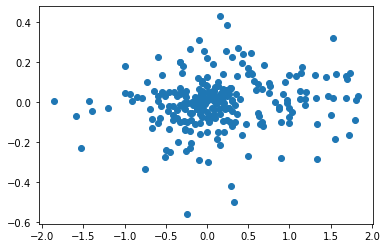

In [216]:
plt.scatter(df_perc_vars["d_eps_seas_perc"], df_perc_vars["cum_ret20"])

In [217]:
df_perc_vars[["cum_ret20", "d_eps_seas_perc", "gn", "bn", "nn"]]

,cum_ret20,d_eps_seas_perc,gn,bn,nn
17,0.007833,-0.006289,False,False,True
18,-0.035811,-0.266667,False,False,True
26,-0.026667,0.871795,True,False,False
27,-0.278746,0.895735,True,False,False
28,0.200772,-0.333333,False,True,False
...,...,...,...,...,...
368,-0.032760,0.867925,True,False,False
369,-0.050616,1.026316,True,False,False
370,0.012729,1.188679,True,False,False
371,-0.066950,0.028571,False,False,True


In [218]:
Y = df_perc_vars["cum_ret20"]
X = df_perc_vars["d_eps_seas_perc"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              cum_ret20   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.120
Date:                Tue, 21 Sep 2021   Prob (F-statistic):             0.0434
Time:                        15:43:34   Log-Likelihood:                 165.01
No. Observations:                 261   AIC:                            -326.0
Df Residuals:                     259   BIC:                            -318.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0057      0.008     

In [219]:
model_nocons = sm.OLS(Y, X)
results = model_nocons.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              cum_ret20   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              3.717
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                      0.0550
Time:                        15:43:36   Log-Likelihood:                          164.77
No. Observations:                 261   AIC:                                     -327.5
Df Residuals:                     260   BIC:                                     -324.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [220]:
df_perc_vars["ticker"].unique()

array(['ARDNA', 'FWMHQ', 'GO', 'HTSI', 'IFMK', 'IMKTA', 'KR', 'NGVC',
       'QKLS', 'RNDY', 'SFM', 'SFS', 'SWY', 'TFM', 'VLGEA', 'WFM', 'WMK'],
      dtype=object)

In [221]:
X = df_perc_vars["d_eps_seas"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              cum_ret20   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4521
Date:                Tue, 21 Sep 2021   Prob (F-statistic):              0.502
Time:                        15:43:48   Log-Likelihood:                 163.18
No. Observations:                 261   AIC:                            -322.4
Df Residuals:                     259   BIC:                            -315.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.008     -0.319      0.7

In [222]:
model_nocons = sm.OLS(Y, X)
results = model_nocons.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              cum_ret20   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.4175
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                       0.519
Time:                        15:43:49   Log-Likelihood:                          163.13
No. Observations:                 261   AIC:                                     -324.3
Df Residuals:                     260   BIC:                                     -320.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [223]:
Y = df_perc_vars["cum_ret20"]
X = df_perc_vars["d_eps_seas_perc"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit(cov_type="cluster", cov_kwds={"groups": df_perc_vars["ticker"]})
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              cum_ret20   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.970
Date:                Tue, 21 Sep 2021   Prob (F-statistic):             0.0637
Time:                        15:43:52   Log-Likelihood:                 165.01
No. Observations:                 261   AIC:                            -326.0
Df Residuals:                     259   BIC:                            -318.9
Df Model:                           1                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0057      0.012     

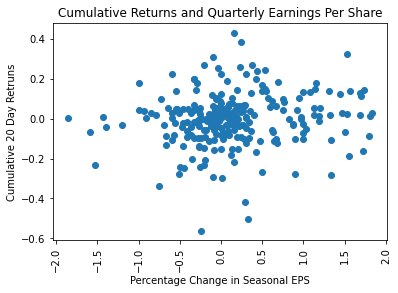

In [224]:
plt.scatter(df_perc_vars["d_eps_seas_perc"], df_perc_vars["cum_ret20"])
plt.xticks(rotation="vertical")
plt.xlabel("Percentage Change in Seasonal EPS")
plt.ylabel("Cumulative 20 Day Retruns")
plt.title("Cumulative Returns and Quarterly Earnings Per Share")
plt.savefig("Cumulative_Returns_20_EPS.pdf", bbox_inches="tight")

In [225]:
df_perc_vars.head()

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,d_eps_seas,d_eps_seas_perc,ebitda,d_ebitda,d_ebitda_perc,d_ebitda_seas,d_ebitda_seas_perc,gn,nn,bn
17,ARDNA,2013-06-30,2013-08-08,2013-08-08,0.0,0.002410,-0.002862,-0.004368,-0.004820,-0.004820,...,-0.01,-0.006289,9360000.0,829000.0,0.086897,-180000.0,-0.018868,False,True,False
18,ARDNA,2013-09-30,2013-11-07,2013-11-07,0.0,-0.003466,0.005006,0.001078,-0.001155,-0.021486,...,-0.44,-0.266667,7523000.0,-1837000.0,-0.187583,-2270000.0,-0.231798,False,True,False
26,FWMHQ,2014-03-31,2014-05-29,2014-05-29,0.0,-0.016296,-0.087407,-0.120000,-0.177778,-0.152593,...,1.02,0.871795,3413000.0,-2767000.0,-0.527651,-1831000.0,-0.349161,True,False,False
27,FWMHQ,2014-06-30,2014-08-07,2014-08-07,0.0,-0.015679,-0.045296,-0.094077,-0.135889,-0.168990,...,1.89,0.895735,3006000.0,-407000.0,-0.029393,16853000.0,1.217087,True,False,False
28,FWMHQ,2014-09-30,2014-11-06,2014-11-06,0.0,0.050193,-0.050193,-0.061776,-0.131274,-0.108108,...,-0.10,-0.333333,-4343000.0,-7349000.0,-103.507042,-4414000.0,-62.169014,False,False,True


In [226]:
for i in range(0, 21):
    df_perc_vars["expec_ret" + str(i)] = i * df_perc_vars["mean_ret_model_cont"]

In [227]:
df_perc_vars[["mean_ret_model_cont", "expec_ret0", "expec_ret1", "expec_ret2"]].head(10)

,mean_ret_model_cont,expec_ret0,expec_ret1,expec_ret2
17,0.001614,0.0,0.001614,0.003229
18,0.001223,0.0,0.001223,0.002446
26,-0.004436,-0.0,-0.004436,-0.008872
27,-0.005961,-0.0,-0.005961,-0.011922
28,-0.008917,-0.0,-0.008917,-0.017833
29,-0.003277,-0.0,-0.003277,-0.006554
30,-0.000803,-0.0,-0.000803,-0.001605
31,-0.002671,-0.0,-0.002671,-0.005343
32,-0.002391,-0.0,-0.002391,-0.004783
33,-0.009226,-0.0,-0.009226,-0.018452


In [228]:
for i in range(0, 21):
    df_perc_vars["abnor_ret" + str(i)] = (
        df_perc_vars["cum_ret_cont" + str(i)] - df_perc_vars["expec_ret" + str(i)]
    )

In [229]:
df_dropped[(df_dropped["ticker"] == "IMKTA") & (df_dropped["date"] == "2018-02-08")]

,ticker,calendardate,datekey,date,cum_ret0,cum_ret1,cum_ret2,cum_ret3,cum_ret4,cum_ret5,...,d_eps_seas,d_eps_seas_perc,ebitda,d_ebitda,d_ebitda_perc,d_ebitda_seas,d_ebitda_seas_perc,gn,nn,bn
87,IMKTA,2017-12-31,2018-02-08,2018-02-08,0.0,-0.013093,0.045827,0.0,0.018003,0.028642,...,1.59,2.271429,64832029.0,-5716780.0,-0.095424,4922594.0,0.082167,True,False,False


In [230]:
df_prices[(df_prices["ticker"] == "IMKTA") & (df_prices["date"] == "2018-02-14")]

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,date_2
19475,IMKTA,2018-02-14,30.75,31.6,30.75,31.425,77844.0,29.621,31.425,2021-04-07,2018-02-14


In [231]:
df_perc_vars["mean_ret_model"].isnull().sum()

3

In [232]:
df_perc_vars["mean_ret_model_cont"].isnull().sum()

3

In [233]:
len(df_perc_vars)

261

In [234]:
df_perc_vars.dropna(how="any", subset=["mean_ret_model"], inplace=True)

In [235]:
len(df_perc_vars)

258

In [236]:
cat1 = df_perc_vars[df_perc_vars["gn"] == 1]

In [237]:
cat2 = df_perc_vars[df_perc_vars["bn"] == 1]

In [238]:
ttest_ind(cat1["abnor_ret20"], cat2["abnor_ret20"])

Ttest_indResult(statistic=1.6127080702442742, pvalue=0.10959737303199028)

In [239]:
ttest_ind(cat1["abnor_ret20"], cat2["abnor_ret20"], equal_var=False)

Ttest_indResult(statistic=1.5910600454286385, pvalue=0.1150244150727638)

In [240]:
gn_bn_nn(df_perc_vars, "abnor_ret20", "d_eps_seas_perc", 0.33)

count    69.000000
mean      0.024139
std       0.135232
min      -0.366170
25%      -0.058822
50%       0.038685
75%       0.129780
max       0.289793
Name: abnor_ret20, dtype: float64
count    143.000000
mean      -0.015751
std        0.144865
min       -0.711750
25%       -0.057992
50%       -0.004628
75%        0.049581
max        0.391570
Name: abnor_ret20, dtype: float64
count    46.000000
mean     -0.018544
std       0.144613
min      -0.382448
25%      -0.084645
50%      -0.011010
75%       0.059323
max       0.361297
Name: abnor_ret20, dtype: float64


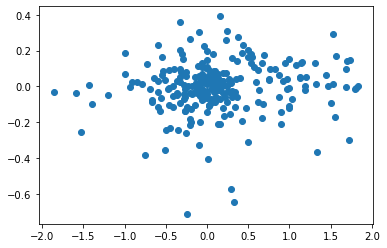

In [241]:
plt.scatter(df_perc_vars["d_eps_seas_perc"], df_perc_vars["abnor_ret20"])

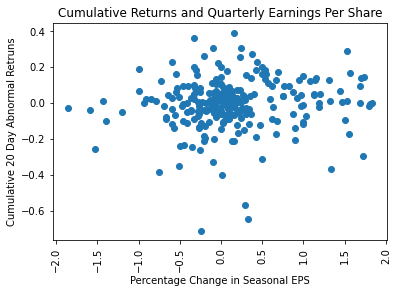

In [242]:
plt.scatter(df_perc_vars["d_eps_seas_perc"], df_perc_vars["abnor_ret20"])
plt.xticks(rotation="vertical")
plt.xlabel("Percentage Change in Seasonal EPS")
plt.ylabel("Cumulative 20 Day Abnormal Retruns")
plt.title("Cumulative Returns and Quarterly Earnings Per Share")
plt.savefig("Cumulative_Abnormal_Returns_20_EPS.pdf", bbox_inches="tight")

In [243]:
Y = df_perc_vars["abnor_ret20"]
X = df_perc_vars["d_eps_seas_perc"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            abnor_ret20   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.591
Date:                Tue, 21 Sep 2021   Prob (F-statistic):              0.109
Time:                        15:44:47   Log-Likelihood:                 137.68
No. Observations:                 258   AIC:                            -271.4
Df Residuals:                     256   BIC:                            -264.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0086      0.009     

In [244]:
model_nocons = sm.OLS(Y, X)
results = model_nocons.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            abnor_ret20   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.087
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                       0.150
Time:                        15:44:51   Log-Likelihood:                          137.23
No. Observations:                 258   AIC:                                     -272.5
Df Residuals:                     257   BIC:                                     -268.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [245]:
X = df_perc_vars["d_eps_seas"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            abnor_ret20   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.040
Date:                Tue, 21 Sep 2021   Prob (F-statistic):              0.309
Time:                        15:44:53   Log-Likelihood:                 136.90
No. Observations:                 258   AIC:                            -269.8
Df Residuals:                     256   BIC:                            -262.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.009     -0.721      0.4

In [246]:
model_nocons = sm.OLS(Y, X)
results = model_nocons.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            abnor_ret20   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.9157
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                       0.339
Time:                        15:44:55   Log-Likelihood:                          136.64
No. Observations:                 258   AIC:                                     -271.3
Df Residuals:                     257   BIC:                                     -267.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [247]:
X = df_perc_vars["d_eps_seas_perc"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit(cov_type="cluster", cov_kwds={"groups": df_perc_vars["ticker"]})
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            abnor_ret20   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.169
Date:                Tue, 21 Sep 2021   Prob (F-statistic):             0.0940
Time:                        15:45:02   Log-Likelihood:                 137.68
No. Observations:                 258   AIC:                            -271.4
Df Residuals:                     256   BIC:                            -264.3
Df Model:                           1                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0086      0.012     

In [248]:
gn_bn_nn(df_perc_vars, "abnor_ret5", "d_eps_seas_perc", 0.33)

count    69.000000
mean      0.014145
std       0.104123
min      -0.255446
25%      -0.033251
50%       0.014094
75%       0.066110
max       0.350385
Name: abnor_ret5, dtype: float64
count    143.000000
mean      -0.008895
std        0.094537
min       -0.496594
25%       -0.031811
50%       -0.004687
75%        0.032367
max        0.328359
Name: abnor_ret5, dtype: float64
count    46.000000
mean     -0.037521
std       0.107802
min      -0.372166
25%      -0.058875
50%      -0.002181
75%       0.021864
max       0.130720
Name: abnor_ret5, dtype: float64


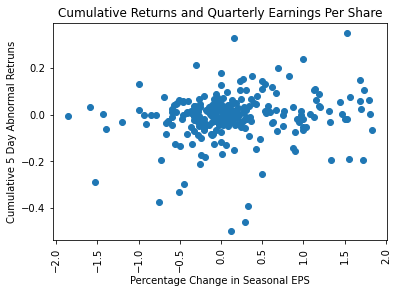

In [249]:
plt.scatter(df_perc_vars["d_eps_seas_perc"], df_perc_vars["abnor_ret5"])
plt.xticks(rotation="vertical")
plt.xlabel("Percentage Change in Seasonal EPS")
plt.ylabel("Cumulative 5 Day Abnormal Retruns")
plt.title("Cumulative Returns and Quarterly Earnings Per Share")
plt.savefig("Cumulative_Abnormal_Returns_5_EPS.pdf", bbox_inches="tight")

In [250]:
ttest_ind(cat1["abnor_ret5"], cat2["abnor_ret5"])
ttest_ind(cat1["abnor_ret5"], cat2["abnor_ret5"], equal_var=False)

Ttest_indResult(statistic=2.5523310592433566, pvalue=0.012307706511390128)

In [251]:
Y = df_perc_vars["abnor_ret5"]
X = df_perc_vars["d_eps_seas_perc"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abnor_ret5   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.752
Date:                Tue, 21 Sep 2021   Prob (F-statistic):             0.0172
Time:                        15:45:20   Log-Likelihood:                 229.69
No. Observations:                 258   AIC:                            -455.4
Df Residuals:                     256   BIC:                            -448.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0110      0.006     

In [252]:
model_nocons = sm.OLS(Y, X)
results = model_nocons.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             abnor_ret5   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              4.315
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                      0.0388
Time:                        15:45:23   Log-Likelihood:                          228.19
No. Observations:                 258   AIC:                                     -454.4
Df Residuals:                     257   BIC:                                     -450.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [253]:
results = model.fit(cov_type="cluster", cov_kwds={"groups": df_perc_vars["ticker"]})
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abnor_ret5   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     6.596
Date:                Tue, 21 Sep 2021   Prob (F-statistic):             0.0206
Time:                        15:45:25   Log-Likelihood:                 229.69
No. Observations:                 258   AIC:                            -455.4
Df Residuals:                     256   BIC:                            -448.3
Df Model:                           1                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0110      0.009     

In [254]:
model_nocons = sm.OLS(Y, X)
results = model_nocons.fit(
    cov_type="cluster", cov_kwds={"groups": df_perc_vars["ticker"]}
)

results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             abnor_ret5   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              5.212
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                      0.0364
Time:                        15:45:28   Log-Likelihood:                          228.19
No. Observations:                 258   AIC:                                     -454.4
Df Residuals:                     257   BIC:                                     -450.8
Df Model:                           1                                                  
Covariance Type:              cluster                                                  
                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [255]:
Y = df_perc_vars["abnor_ret5"]
X = df_perc_vars["d_eps_seas"]
X_model = sm.add_constant(X)
model = sm.OLS(Y, X_model)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abnor_ret5   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2633
Date:                Tue, 21 Sep 2021   Prob (F-statistic):              0.608
Time:                        15:45:36   Log-Likelihood:                 226.95
No. Observations:                 258   AIC:                            -449.9
Df Residuals:                     256   BIC:                            -442.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0081      0.006     -1.292      0.1

In [256]:
gn_bn_nn(df_perc_vars, "abnor_ret20", "d_eps_seas_perc", 0.33)

count    69.000000
mean      0.024139
std       0.135232
min      -0.366170
25%      -0.058822
50%       0.038685
75%       0.129780
max       0.289793
Name: abnor_ret20, dtype: float64
count    143.000000
mean      -0.015751
std        0.144865
min       -0.711750
25%       -0.057992
50%       -0.004628
75%        0.049581
max        0.391570
Name: abnor_ret20, dtype: float64
count    46.000000
mean     -0.018544
std       0.144613
min      -0.382448
25%      -0.084645
50%      -0.011010
75%       0.059323
max       0.361297
Name: abnor_ret20, dtype: float64


In [257]:
time = []
gn_vector = []
bn_vector = []
nn_vector = []
for i in range(0, 21):
    time.append(i)

for i in range(0, 21):
    meanzy_gn = df_perc_vars["abnor_ret" + str(i)][df_perc_vars["gn"] == True].mean()
    gn_vector.append(meanzy_gn)
    meanzy_bn = df_perc_vars["abnor_ret" + str(i)][df_perc_vars["bn"] == True].mean()
    bn_vector.append(meanzy_bn)
    meanzy_nn = df_perc_vars["abnor_ret" + str(i)][df_perc_vars["nn"] == True].mean()
    nn_vector.append(meanzy_nn)

In [258]:
sum(gn_vector) / len(gn_vector)

0.0176210370117001

In [259]:
sum(nn_vector) / len(nn_vector)

-0.008920947700953197

In [260]:
sum(bn_vector) / len(bn_vector)

-0.025882410568338326

In [261]:
gn_vector[20]

0.024139151911980284

In [262]:
nn_vector[20]

-0.015750713304020524

In [263]:
bn_vector[20]

-0.018543653274323654

In [264]:
graphix = pd.DataFrame(
    list(zip(time, gn_vector, bn_vector, nn_vector)),
    columns=["time", "gn", "bn", "nn"],
)

In [265]:
graphix

,time,gn,bn,nn
0,0,0.000000,0.000000,0.000000
1,1,0.007636,-0.010430,-0.000251
2,2,0.015099,-0.035036,-0.004836
3,3,0.018228,-0.035652,-0.003932
4,4,0.017537,-0.036874,-0.006459
5,5,0.014145,-0.037521,-0.008895
6,6,0.017928,-0.034766,-0.009636
7,7,0.015612,-0.037246,-0.008194
8,8,0.015159,-0.035775,-0.007057
9,9,0.011501,-0.026699,-0.006984


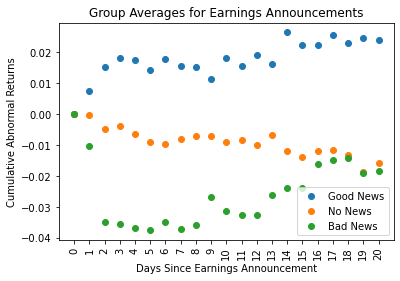

In [266]:
plt.scatter(graphix["time"], graphix["gn"], label="Good News")
plt.scatter(graphix["time"], graphix["nn"], label="No News")
plt.scatter(graphix["time"], graphix["bn"], label="Bad News")
plt.xticks(graphix["time"], rotation="vertical")
plt.xlabel("Days Since Earnings Announcement")
plt.ylabel("Cumulative Abnormal Returns")
plt.legend()
plt.title("Group Averages for Earnings Announcements")
plt.savefig("Mackinlay_Graph.pdf", bbox_inches="tight")

In [267]:
df_perc_vars.to_excel("abnormal.xlsx", index=False)